In [99]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "social-anxiety-dataset"

# **Table of Contents**
------------------------
**✅ Load Libraries.**   
**✅ Data Load with EDA**   
**✅ Data Transform.**   
**✅ Data Visulaization.**   
**✅ Prediction Modeling and ML.**

--------------------------

# **Load Libraries**

In [100]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

# **1. Data Import**

In [101]:
df <- read.csv('/kaggle/input/social-anxiety-dataset/enhanced_anxiety_dataset.csv') %>% janitor::clean_names()

## **Data Description**
------------------
### **Social Anxiety Dataset – Behavioral, Lifestyle & Psychological Factors**   
* Demographics: Age, Gender, Occupation.   
* Lifestyle: Sleep hours, Physical activity, Diet quality, Alcohol use, Caffeine intake, Smoking habits.   
* Health & Mental Indicators: Heart rate, Breathing rate, Stress level, Sweating level, Dizziness.   
* Mental Health History: Family history of anxiety, Use of medication, Therapy frequency.   
* Life Events: Recent major life events.   
* Target Variable: Anxiety Level (1-10) – Quantifies the individual’s social anxiety intensity.    

### **Use Cases**   
* Build regression or classification models to predict social anxiety levels.   
* Identify key risk factors contributing to anxiety.   
* Visualize correlations and psychological behavior trends.   
* Experiment with feature engineering and model interpretability techniques.   

## **Summary**

In [102]:
glimpse(df)

Rows: 11,000
Columns: 19
$ age                             <int> 29, 46, 64, 20, 49, 53, 20, 54, 51, 59…
$ gender                          <chr> "Female", "Other", "Male", "Female", "…
$ occupation                      <chr> "Artist", "Nurse", "Other", "Scientist…
$ sleep_hours                     <dbl> 6.0, 6.2, 5.0, 5.8, 8.2, 6.4, 7.9, 6.3…
$ physical_activity_hrs_week      <dbl> 2.7, 5.7, 3.7, 2.8, 2.3, 6.5, 2.5, 5.5…
$ caffeine_intake_mg_day          <int> 181, 200, 117, 360, 247, 235, 78, 535,…
$ alcohol_consumption_drinks_week <int> 10, 8, 4, 6, 4, 2, 14, 15, 2, 15, 4, 1…
$ smoking                         <chr> "Yes", "Yes", "No", "Yes", "Yes", "No"…
$ family_history_of_anxiety       <chr> "No", "Yes", "Yes", "No", "No", "No", …
$ stress_level_1_10               <int> 10, 1, 1, 4, 1, 9, 8, 5, 2, 5, 3, 2, 1…
$ heart_rate_bpm                  <int> 114, 62, 91, 86, 98, 84, 118, 113, 81,…
$ breathing_rate_breaths_min      <int> 14, 23, 28, 17, 19, 14, 21, 19, 22, 28…
$ sweating_leve

In [103]:
summary(df)

      age           gender           occupation         sleep_hours    
 Min.   :18.00   Length:11000       Length:11000       Min.   : 2.300  
 1st Qu.:29.00   Class :character   Class :character   1st Qu.: 5.900  
 Median :40.00   Mode  :character   Mode  :character   Median : 6.700  
 Mean   :40.24                                         Mean   : 6.651  
 3rd Qu.:51.00                                         3rd Qu.: 7.500  
 Max.   :64.00                                         Max.   :11.300  
 physical_activity_hrs_week caffeine_intake_mg_day
 Min.   : 0.000             Min.   :  0.0         
 1st Qu.: 1.500             1st Qu.:172.0         
 Median : 2.800             Median :273.0         
 Mean   : 2.942             Mean   :286.1         
 3rd Qu.: 4.200             3rd Qu.:382.0         
 Max.   :10.100             Max.   :599.0         
 alcohol_consumption_drinks_week   smoking          family_history_of_anxiety
 Min.   : 0.000                  Length:11000       Length:11

In [104]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,11000,40.241727,13.2361401,40.0,40.073523,16.30860,18.0,64.0,46.0,0.097309668,-1.12671477,0.126201644
gender*,2,11000,1.989364,0.8170025,2.0,1.986705,1.48260,1.0,3.0,2.0,0.019550980,-1.50173798,0.007789813
occupation*,3,11000,6.981273,3.7442582,7.0,6.985795,4.44780,1.0,13.0,12.0,-0.005667793,-1.21629735,0.035700101
sleep_hours,4,11000,6.650691,1.2275090,6.7,6.683102,1.18608,2.3,11.3,9.0,-0.224410982,-0.04862837,0.011703839
physical_activity_hrs_week,5,11000,2.942136,1.8278254,2.8,2.835000,1.92738,0.0,10.1,10.1,0.506871695,-0.21603141,0.017427631
caffeine_intake_mg_day,6,11000,286.090000,144.8131567,273.0,279.965682,155.67300,0.0,599.0,599.0,0.323852976,-0.70209057,1.380739273
alcohol_consumption_drinks_week,7,11000,9.701636,5.6897128,10.0,9.731250,7.41300,0.0,19.0,19.0,-0.023327381,-1.15953330,0.054249283
smoking*,8,11000,1.525364,0.4993790,2.0,1.531705,0.00000,1.0,2.0,1.0,-0.101571480,-1.98986411,0.004761392
family_history_of_anxiety*,9,11000,1.531545,0.4990266,2.0,1.539432,0.00000,1.0,2.0,1.0,-0.126416461,-1.98419924,0.004758032


In [105]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             11000 
Number of columns          19    
_______________________          
Column type frequency:           
  character                7     
  numeric                  12    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable             n_missing complete_rate min max empty n_unique
1 gender                            0             1   4   6     0        3
2 occupation                        0             1   4  10     0       13
3 smoking                           0             1   2   3     0        2
4 family_history_of_anxiety         0             1   2   3     0        2
5 dizziness                         0             1   2   3     0        2
6 medication                        0             1   2   3     0        2
7 recent_maj

## **Checking Missing Value & Duplicate Value**

In [106]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
age,0
gender,0
occupation,0
sleep_hours,0
physical_activity_hrs_week,0
caffeine_intake_mg_day,0
alcohol_consumption_drinks_week,0
smoking,0
family_history_of_anxiety,0


In [107]:
sum(duplicated(df))

[1] 0

In [108]:
head(df)

,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,anxiety_level_1_10
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>
1,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5
2,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3
3,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1
4,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2
5,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1
6,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4


In [109]:
tail(df)

,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,anxiety_level_1_10
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>
10995,51,Female,Freelancer,6.3,4.3,144,14,No,Yes,4,93,29,4,Yes,Yes,8,No,4,4
10996,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6
10997,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3
10998,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4
10999,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4
11000,56,Other,Teacher,6.1,1.1,205,11,No,No,1,66,13,3,No,No,2,Yes,8,2


# **2. Data Transformation**

In [110]:
# Create a Target
df <- df %>% mutate(
    anxiety_level = ifelse(anxiety_level_1_10 >= 5, 'High', 'Low' )
    )

In [111]:
# Data Type Conversion (Character -> Factor)

df <- df %>% mutate(across(
    c(
        where(is.character)
     ),
    ~as.factor(.x)
    )) 

# **3. Data Visualization**

In [112]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor)) %>% colnames()

In [113]:
cat('num_cols :', num_cols,'\n')
cat('length :', length(num_cols),'\n')
cat('------------------------------\n')
cat('cat_cols :', cat_cols,'\n')
cat('length :', length(cat_cols),'\n')

num_cols : age sleep_hours physical_activity_hrs_week caffeine_intake_mg_day alcohol_consumption_drinks_week stress_level_1_10 heart_rate_bpm breathing_rate_breaths_min sweating_level_1_5 therapy_sessions_per_month diet_quality_1_10 anxiety_level_1_10 
length : 12 
------------------------------
cat_cols : gender occupation smoking family_history_of_anxiety dizziness medication recent_major_life_event anxiety_level 
length : 8 


## **Histogram & Boxplot & Densityplot**

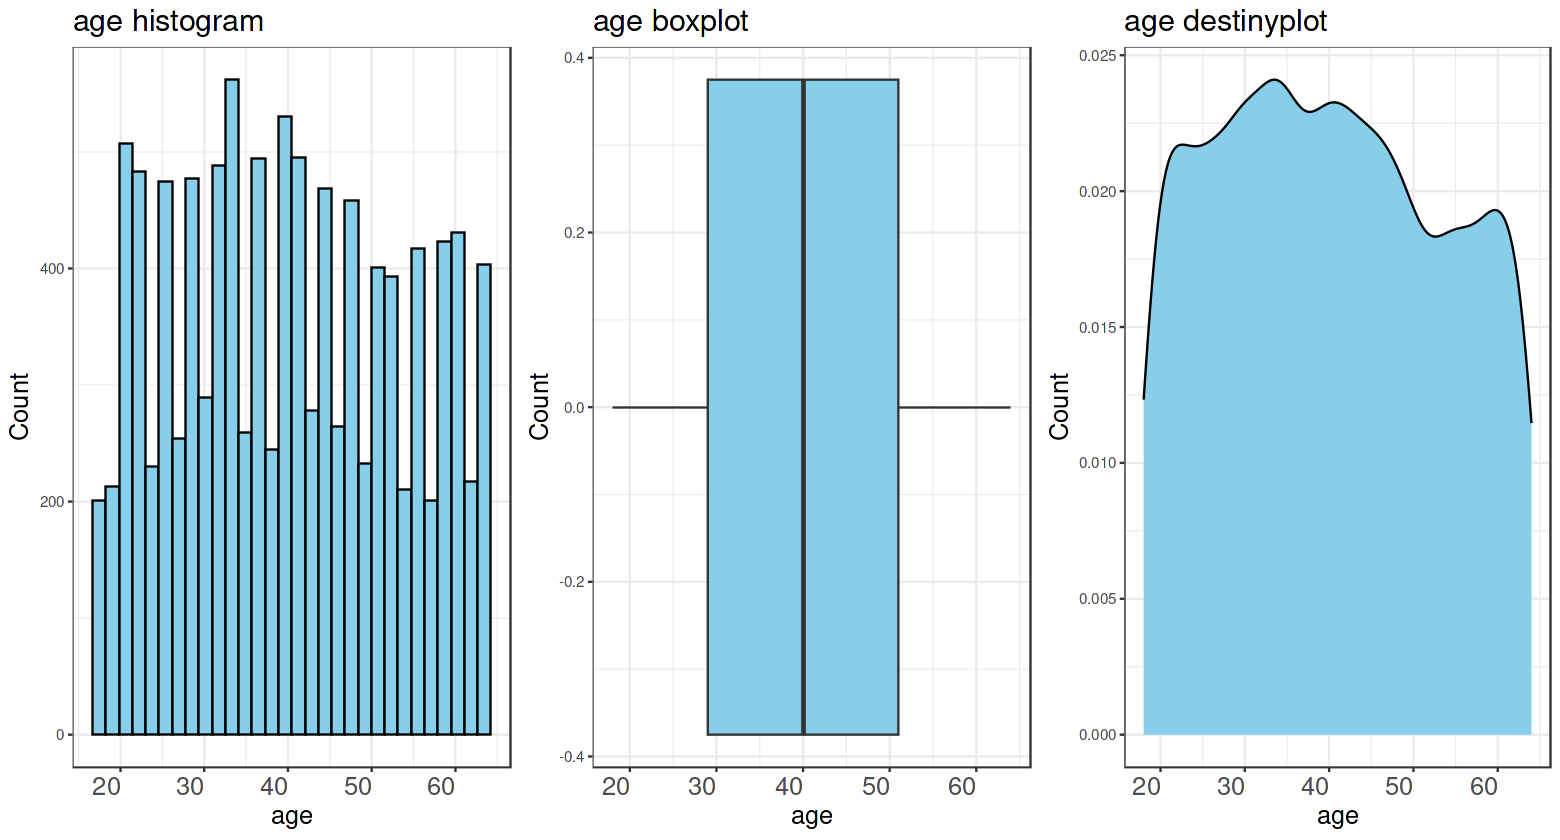

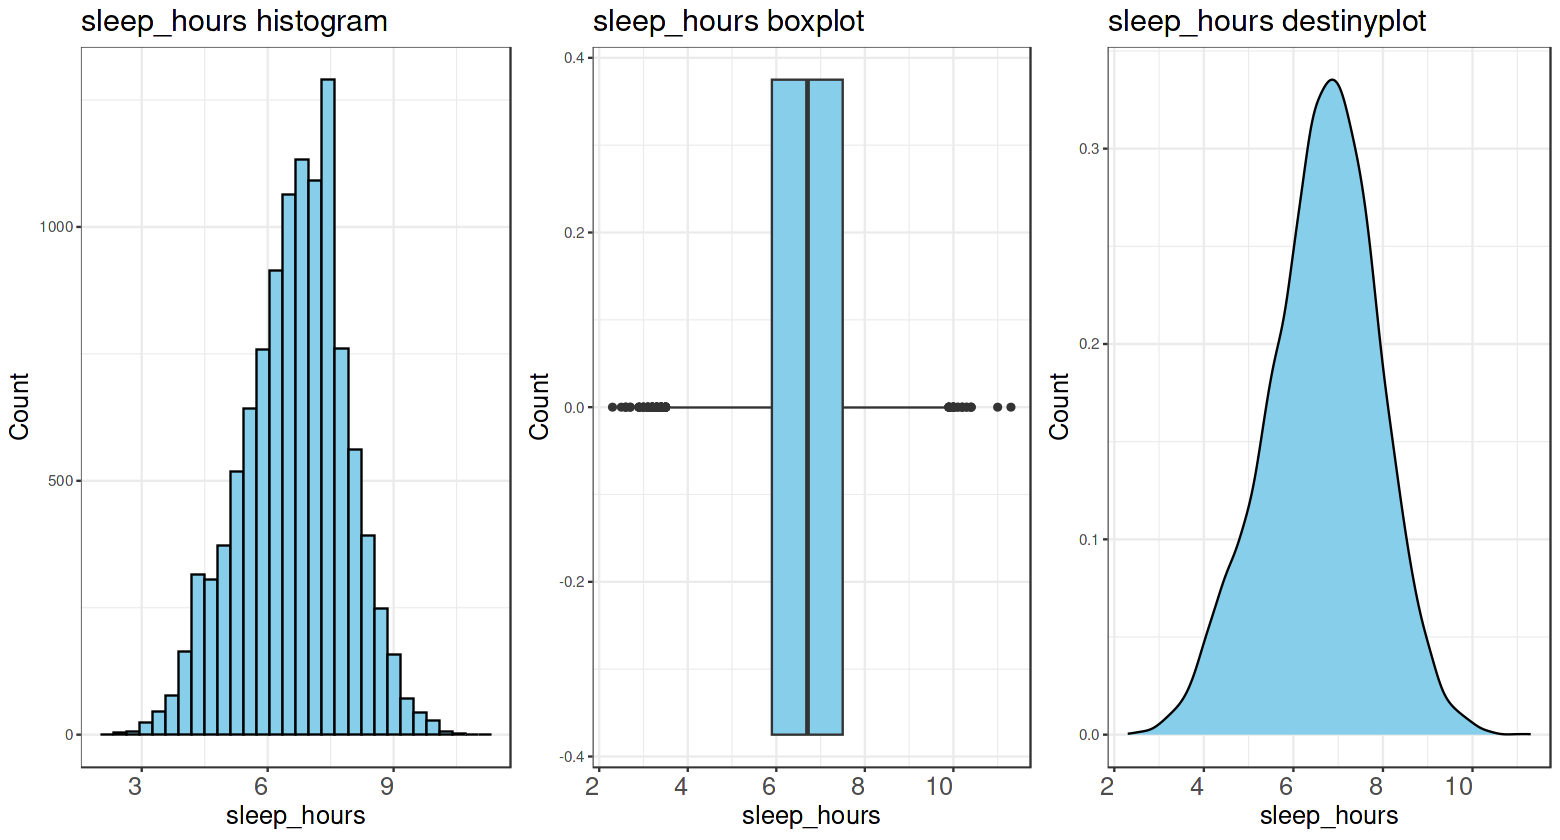

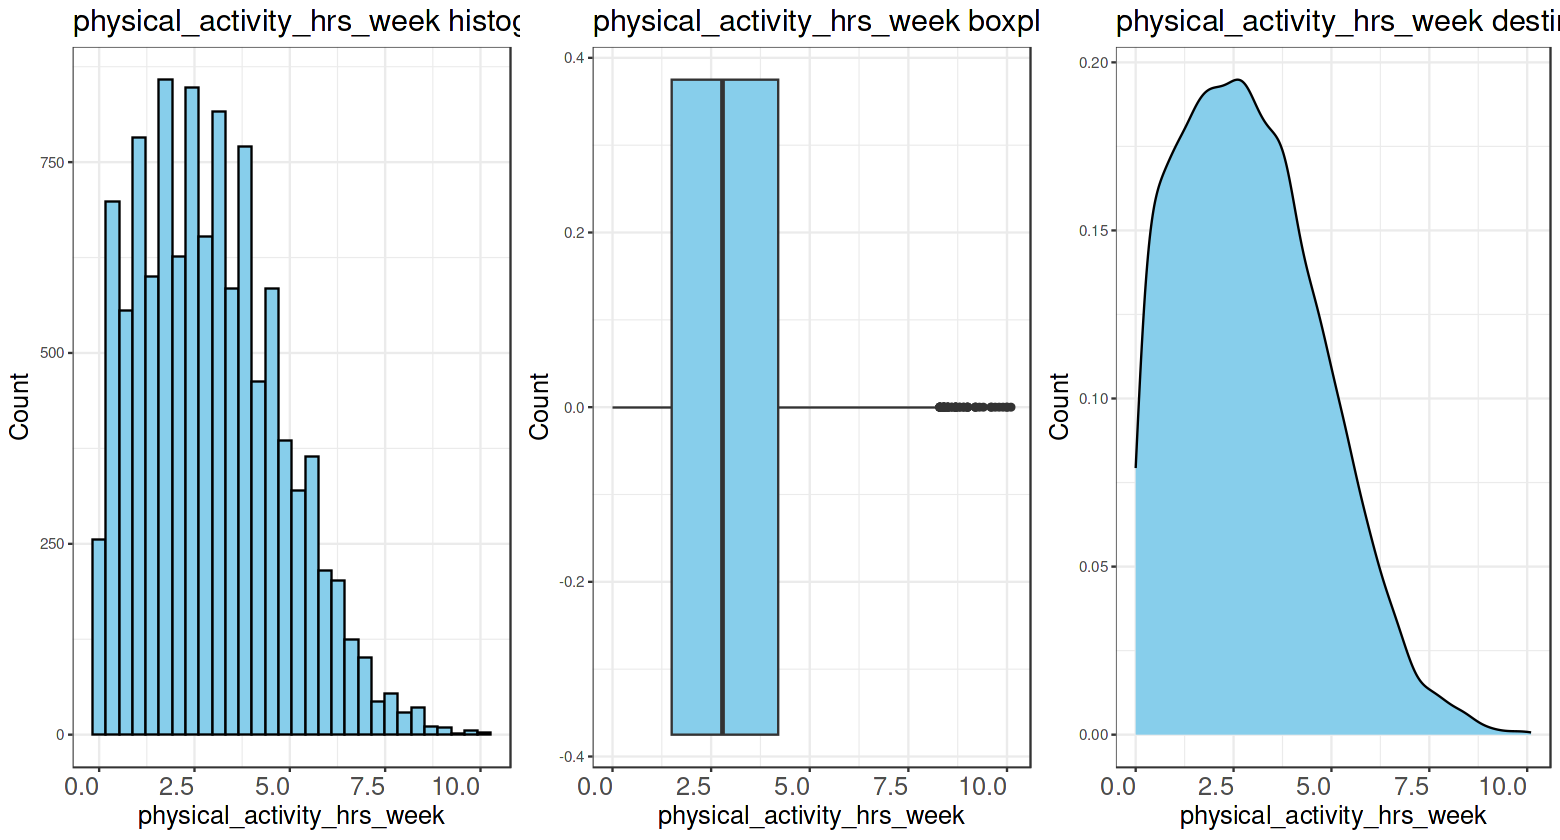

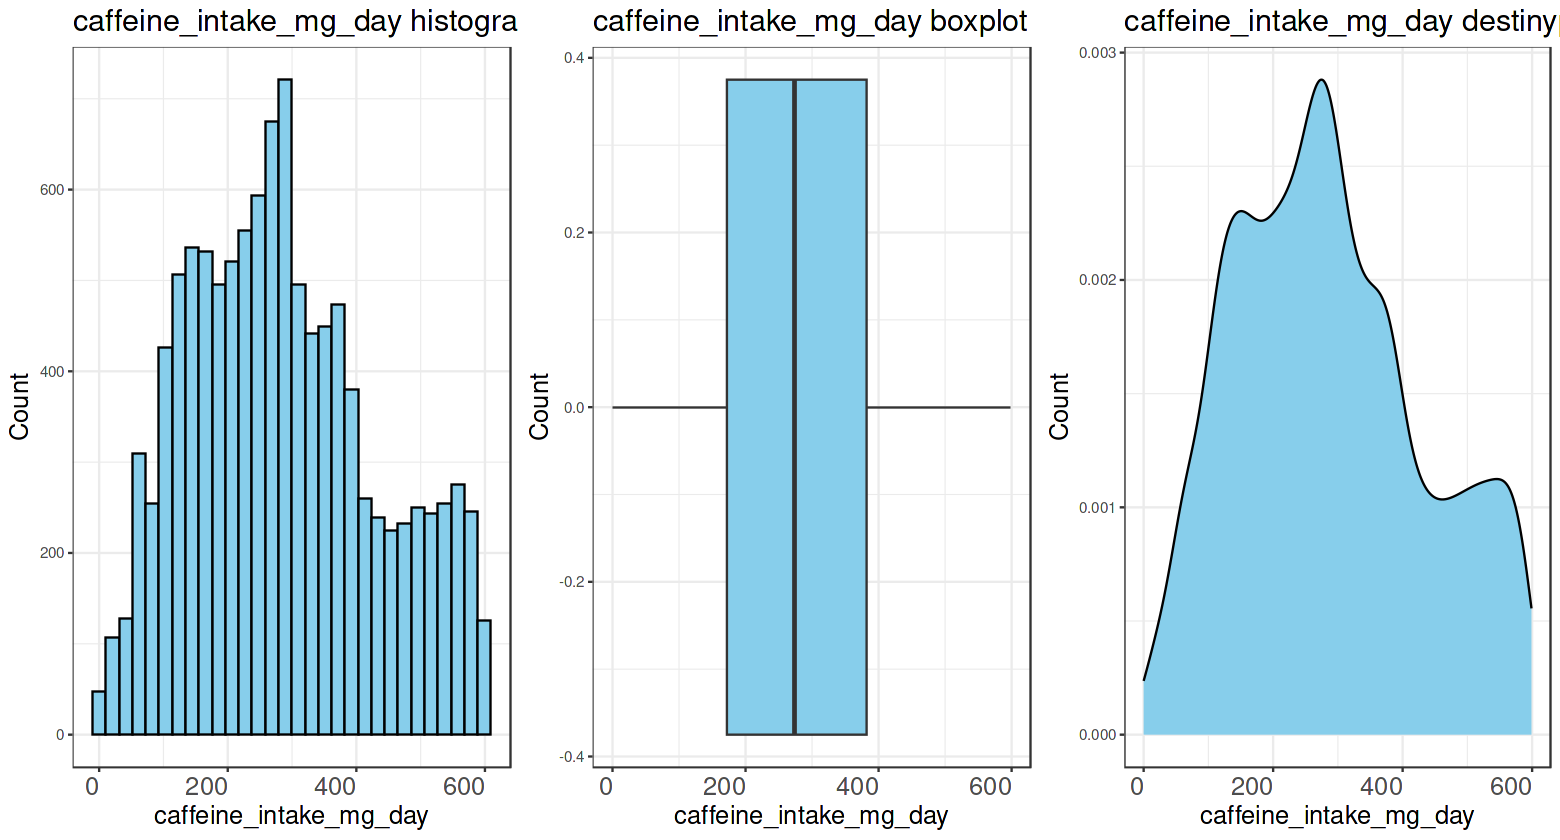

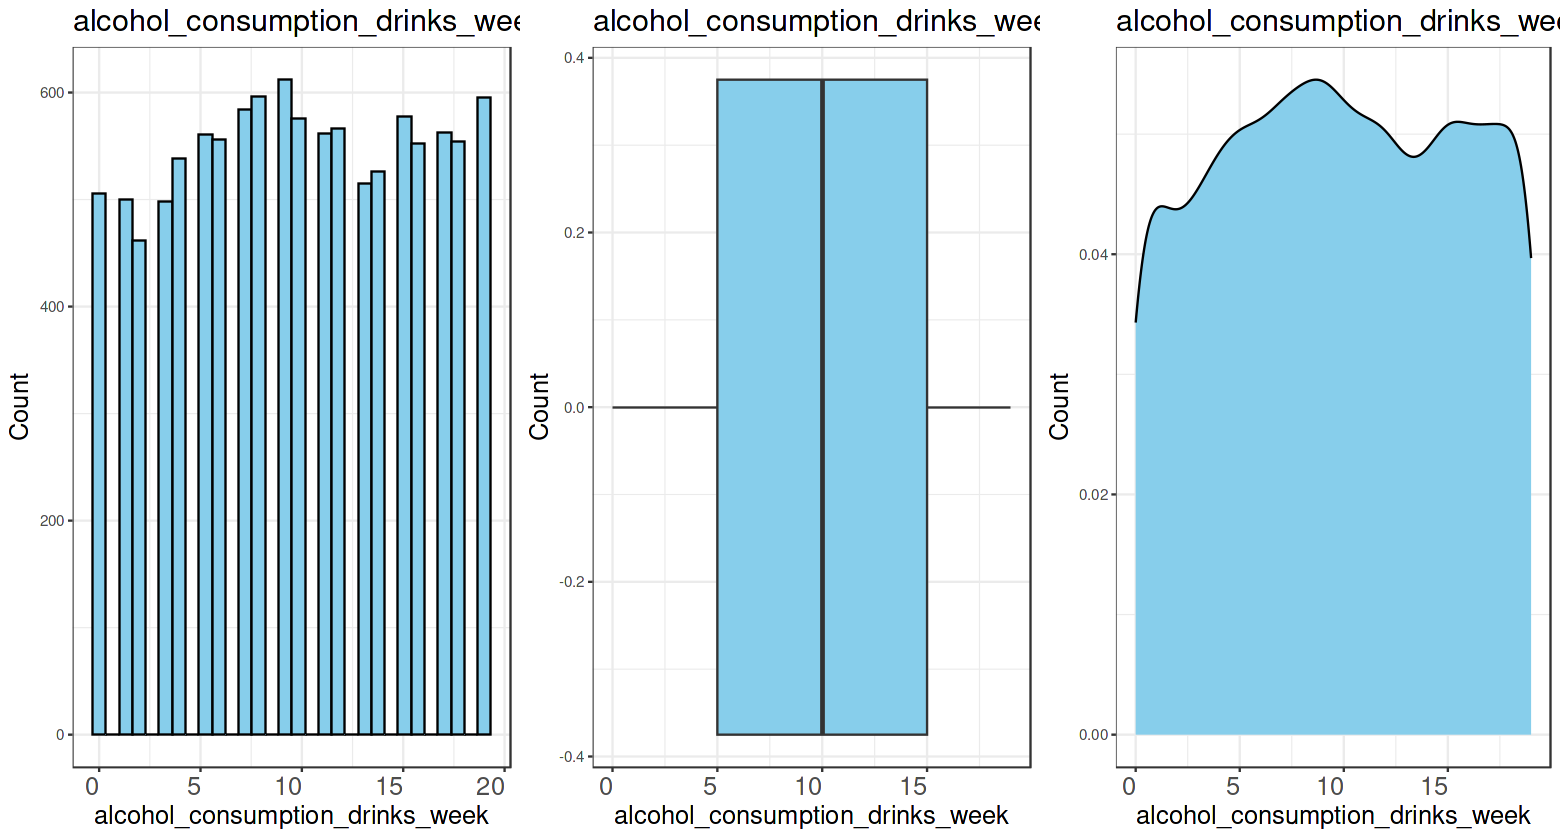

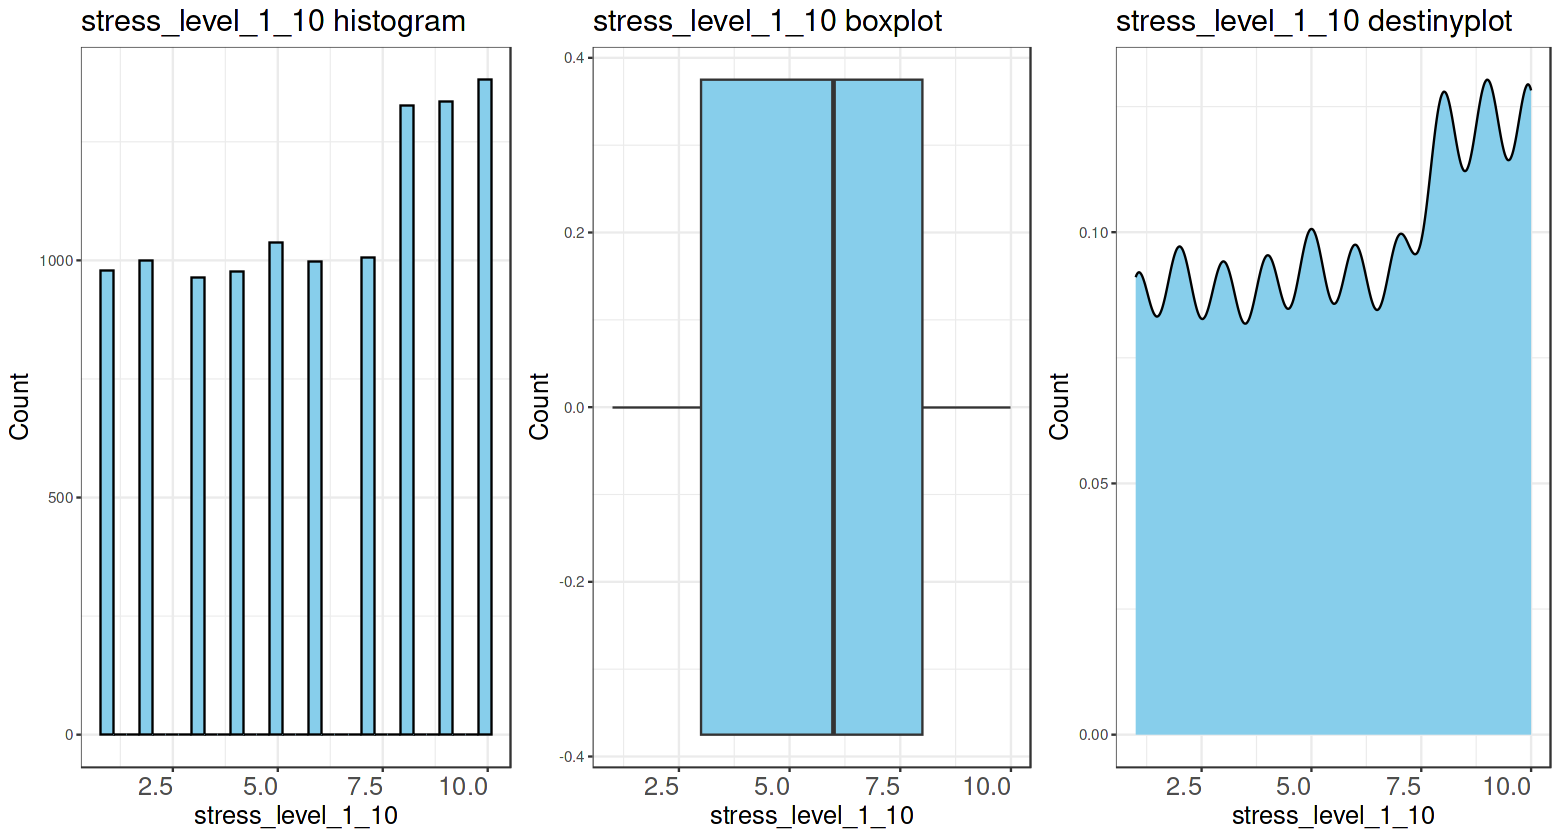

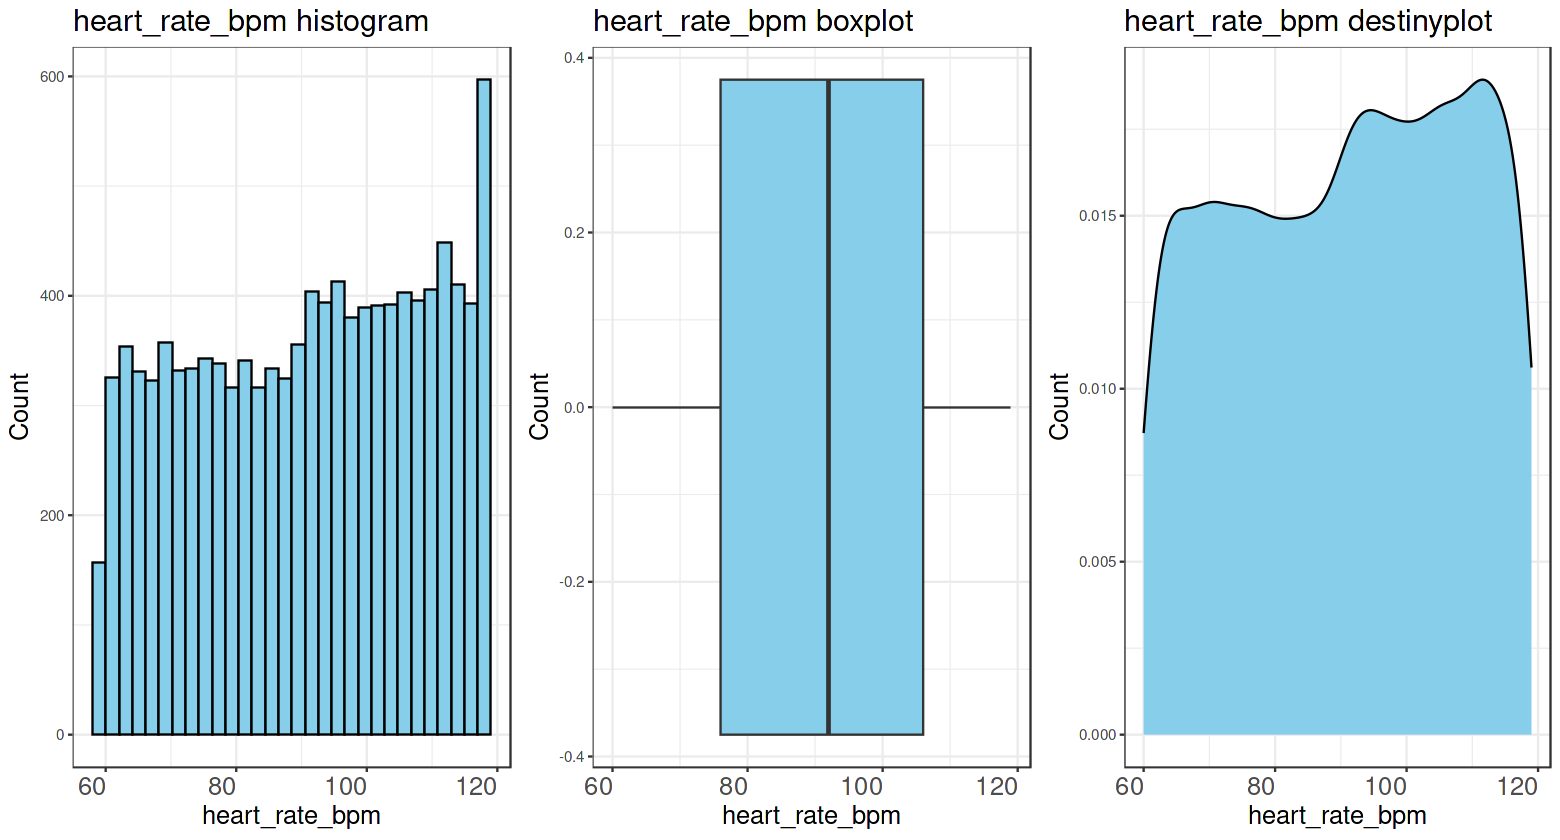

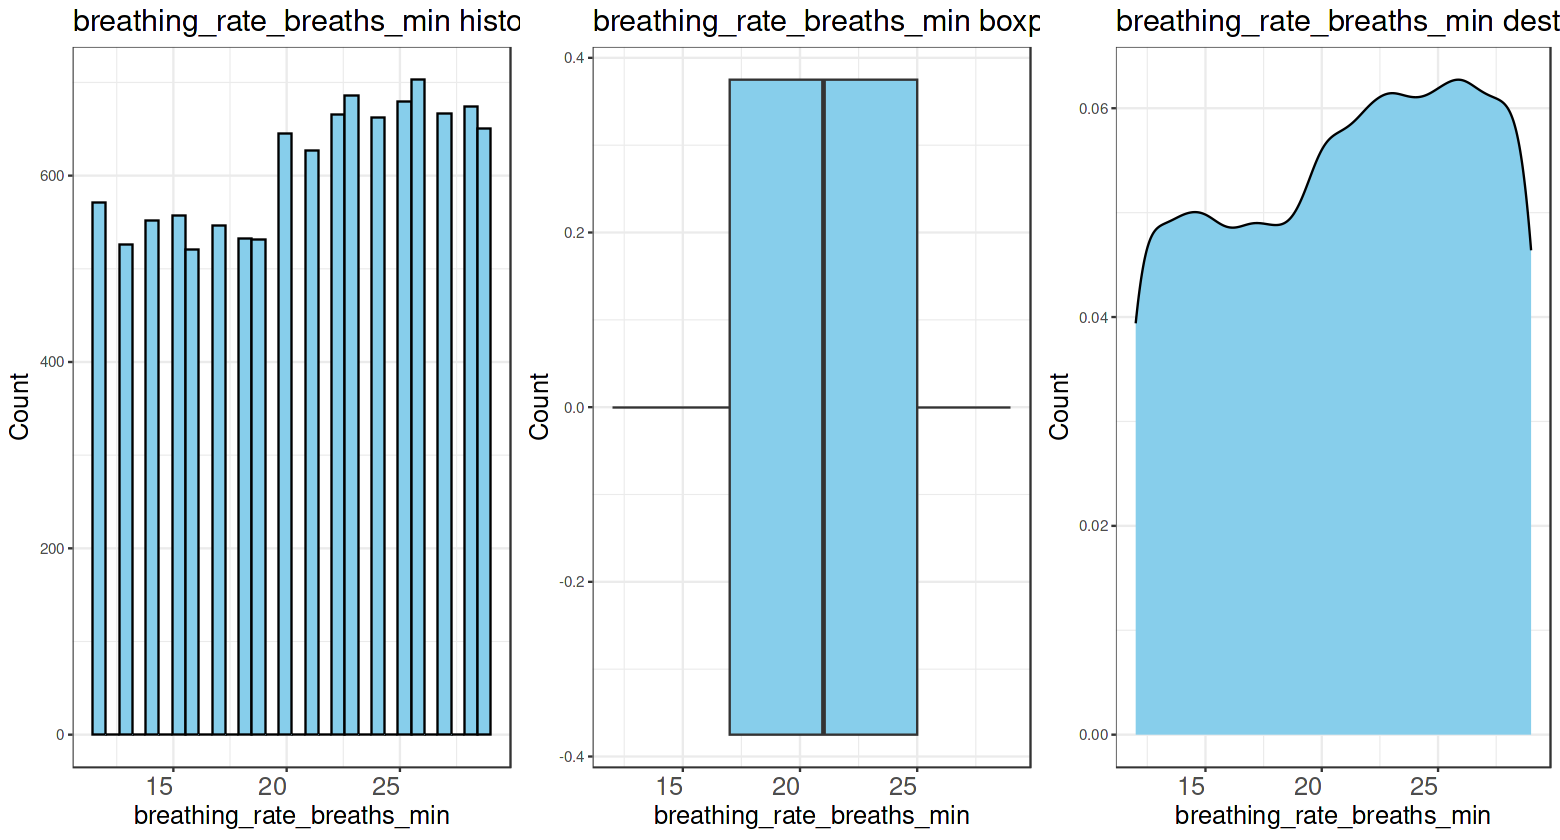

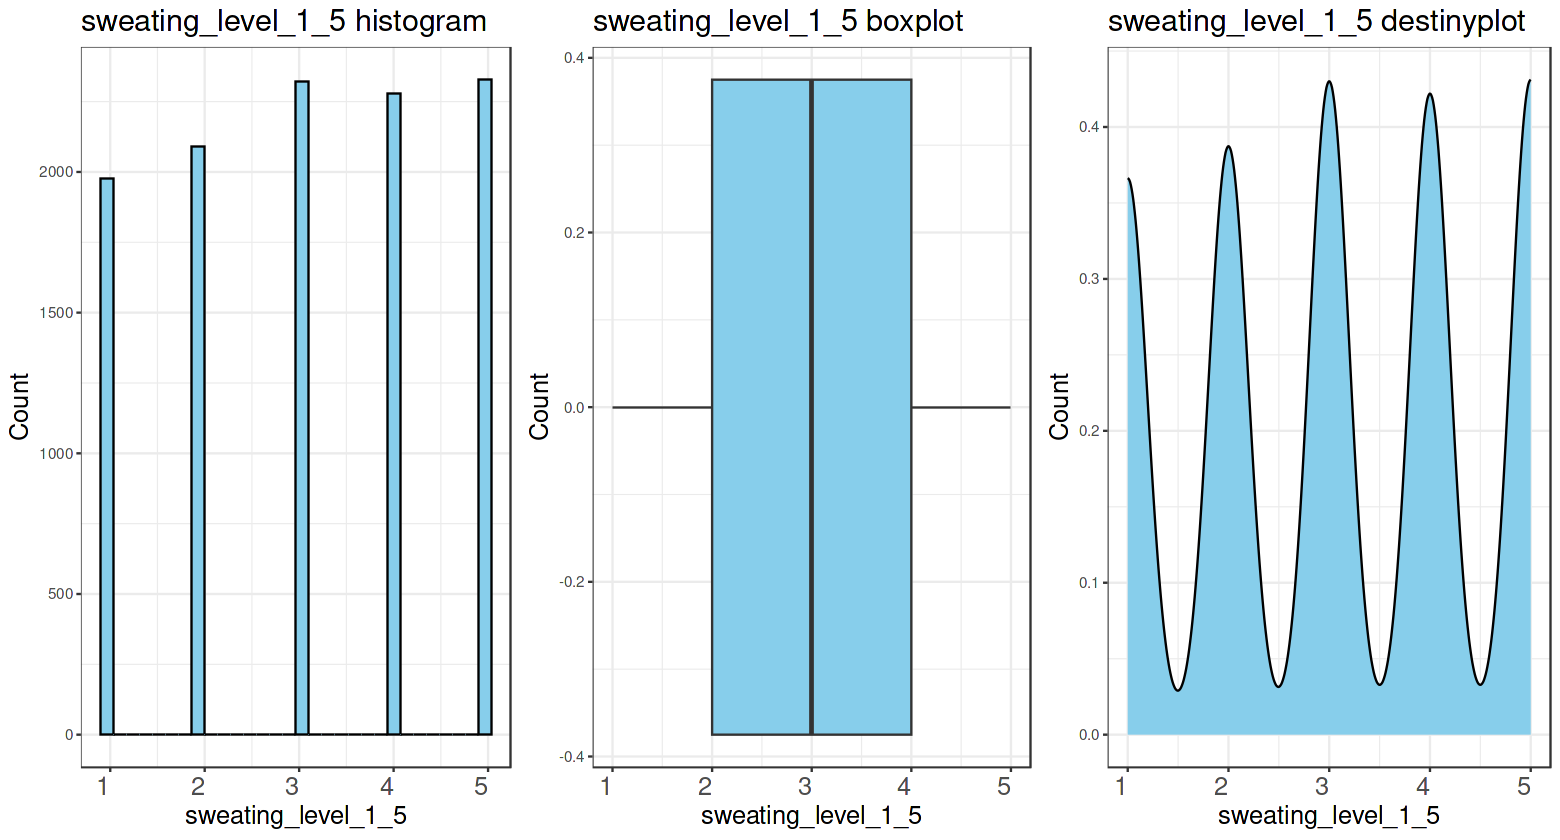

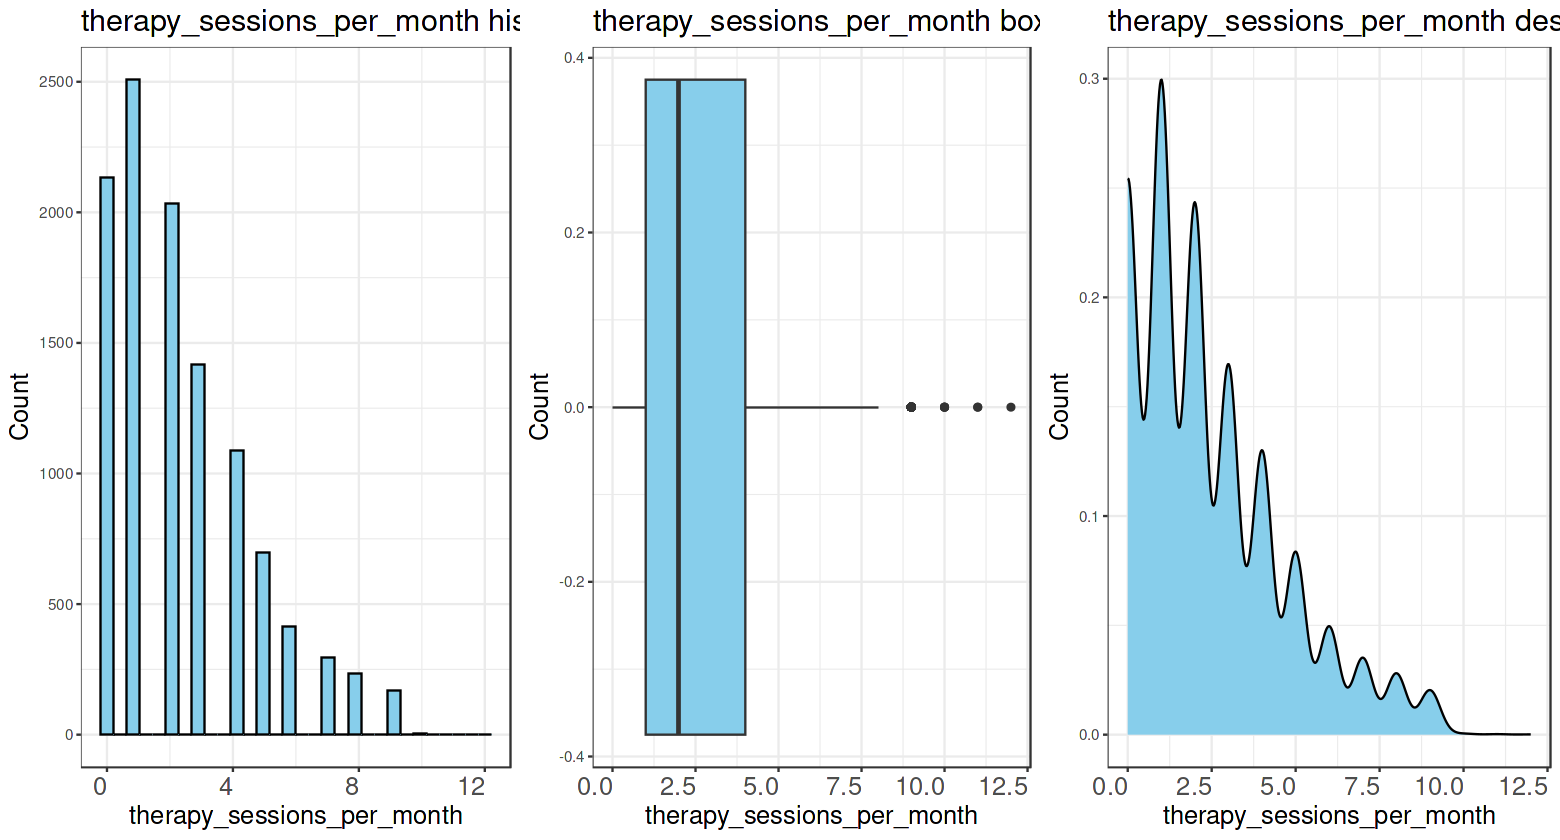

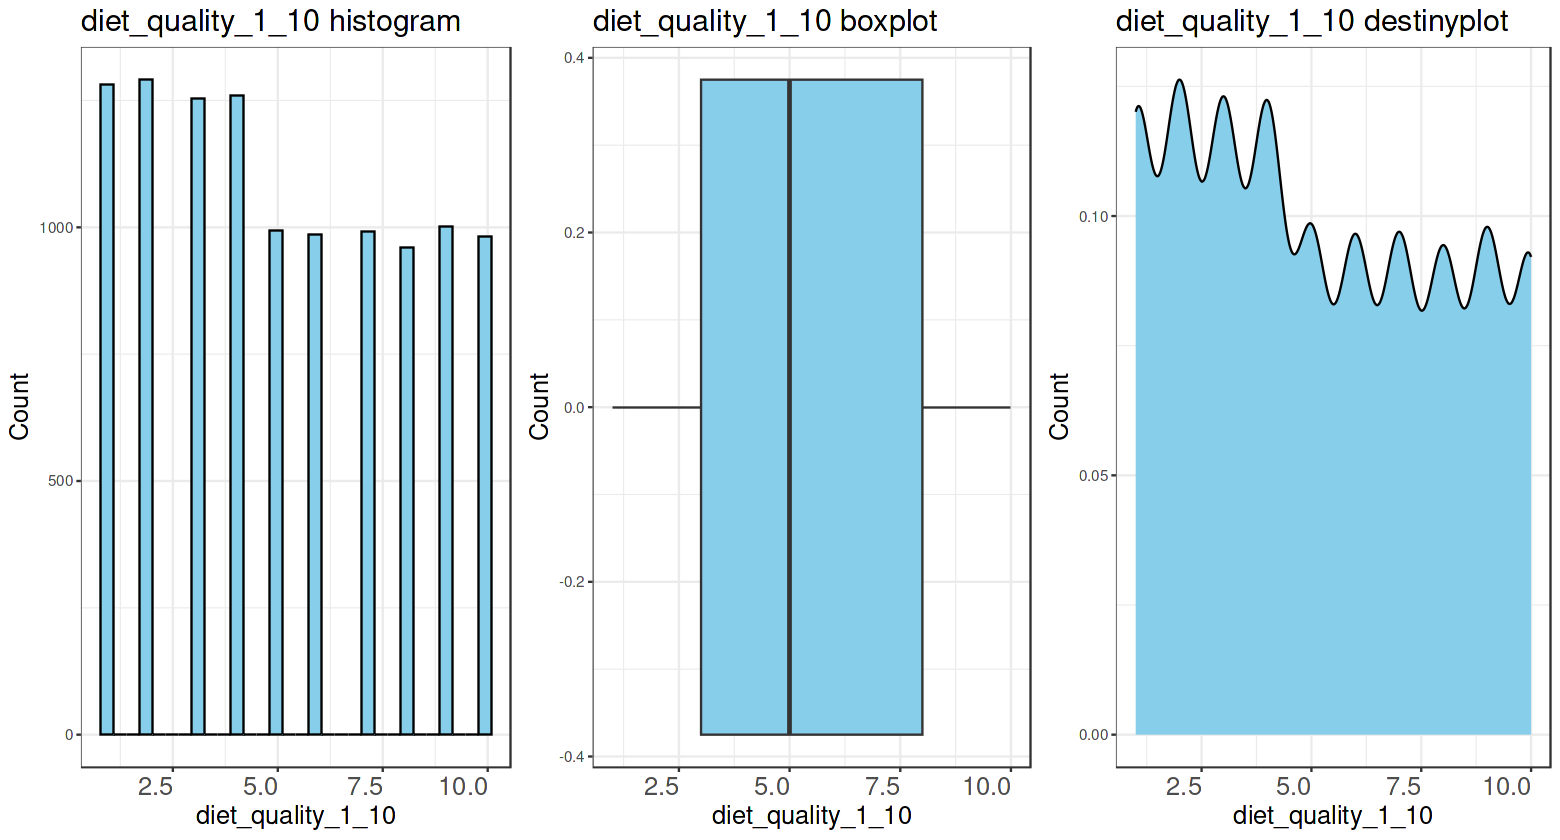

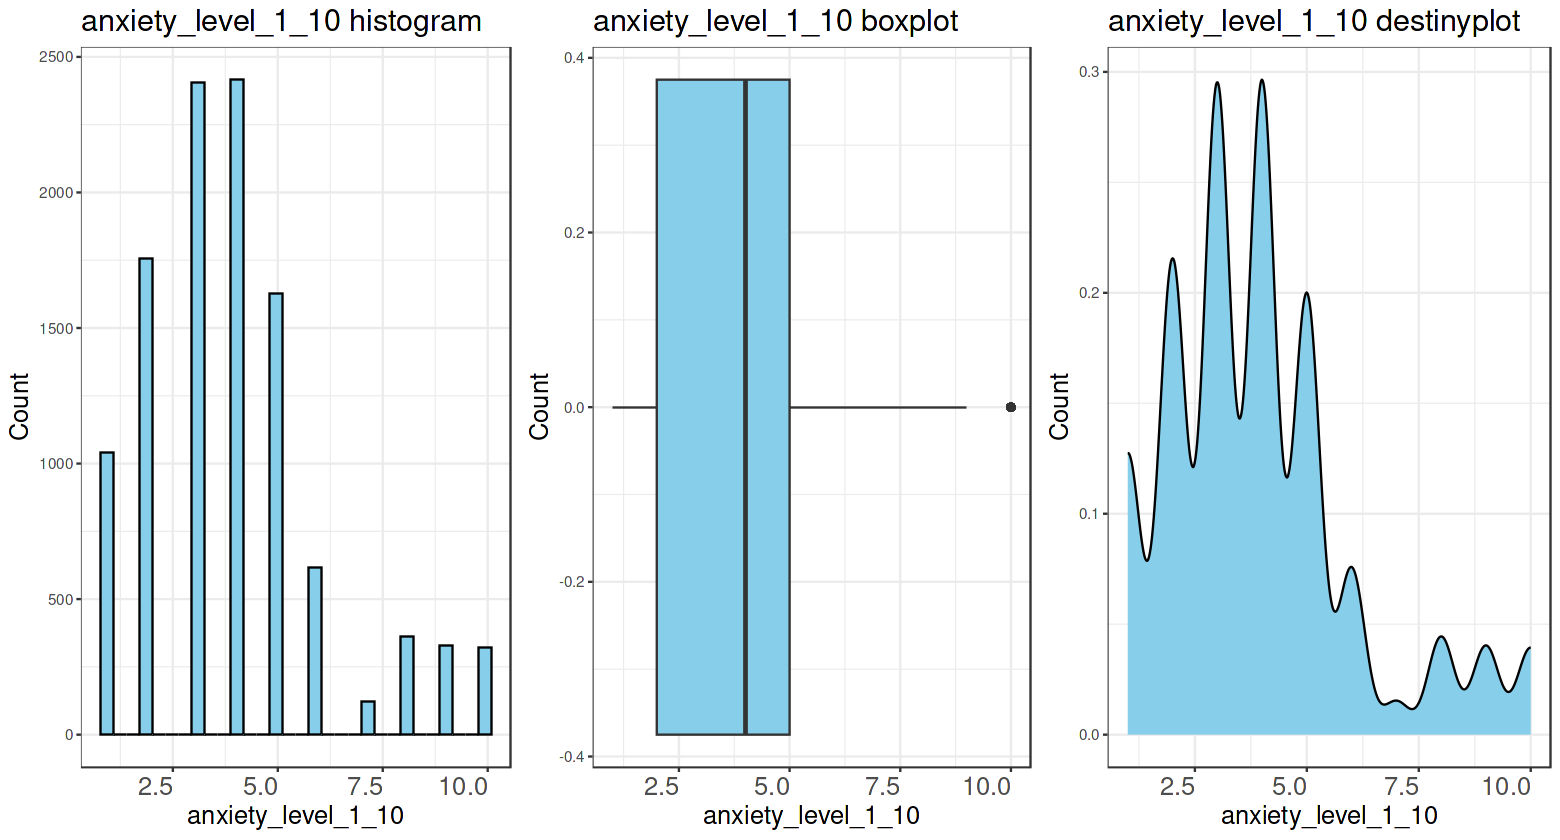

In [114]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}



**As a result of checking the boxplot, there are outliers.Histograms and density graphs show the distribution of the data.**


## **CountPlot**

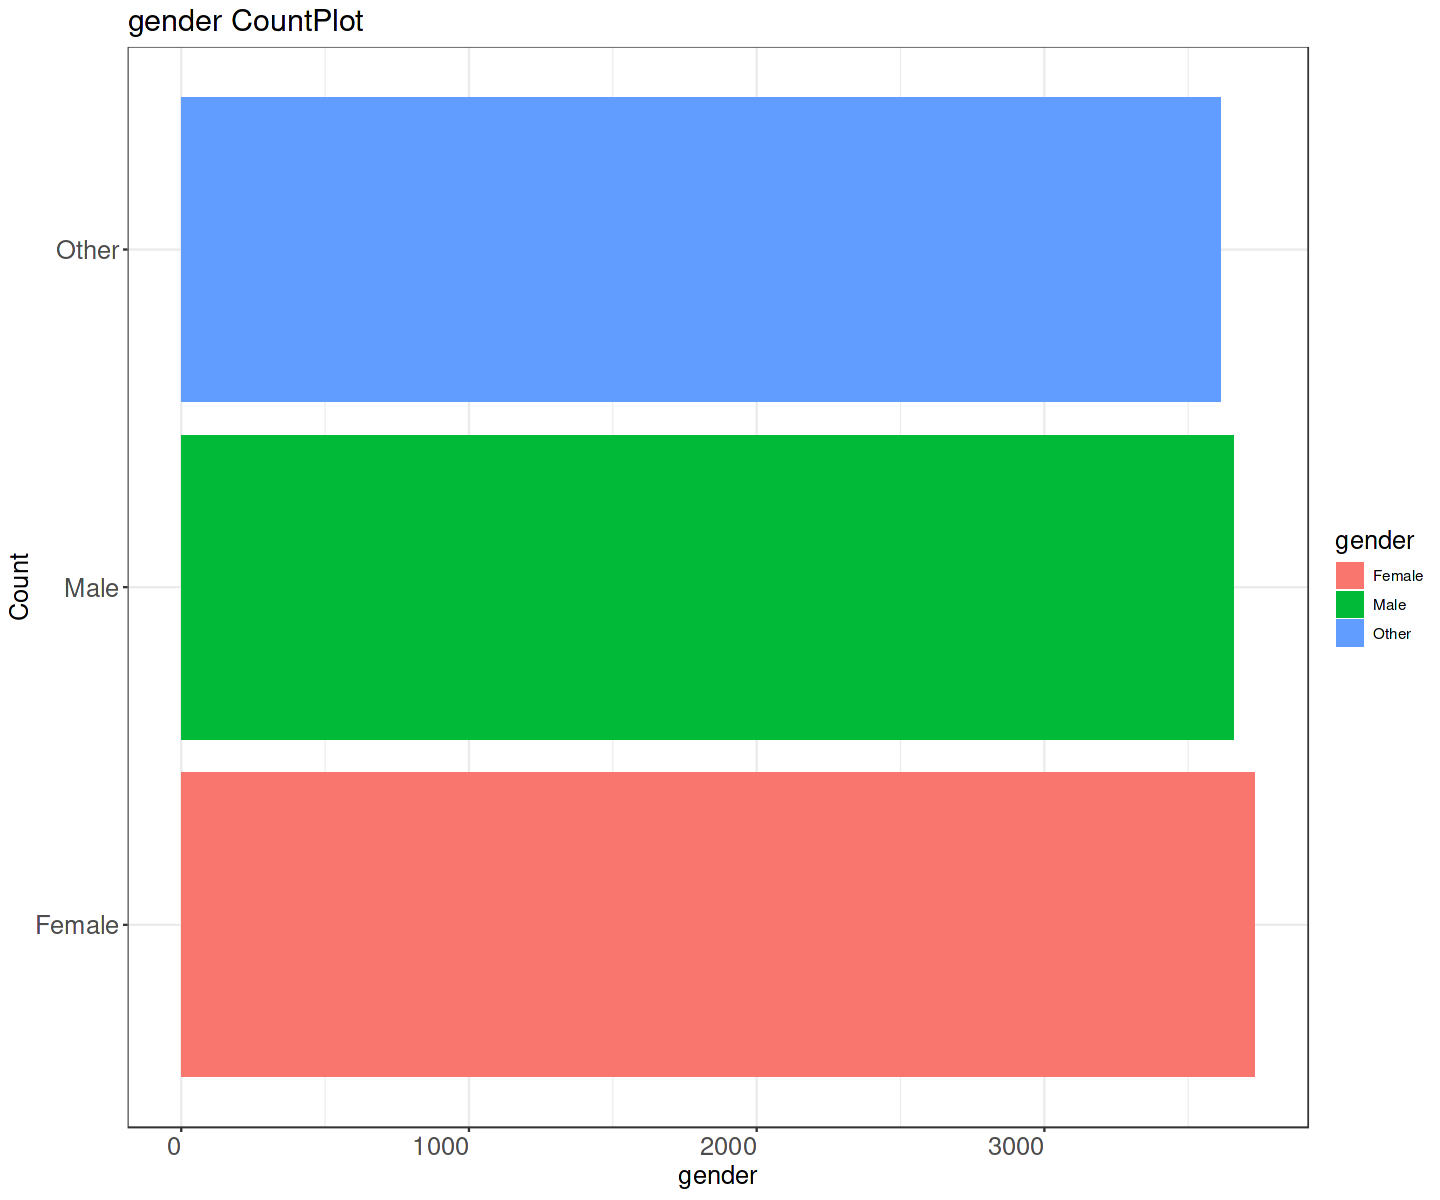

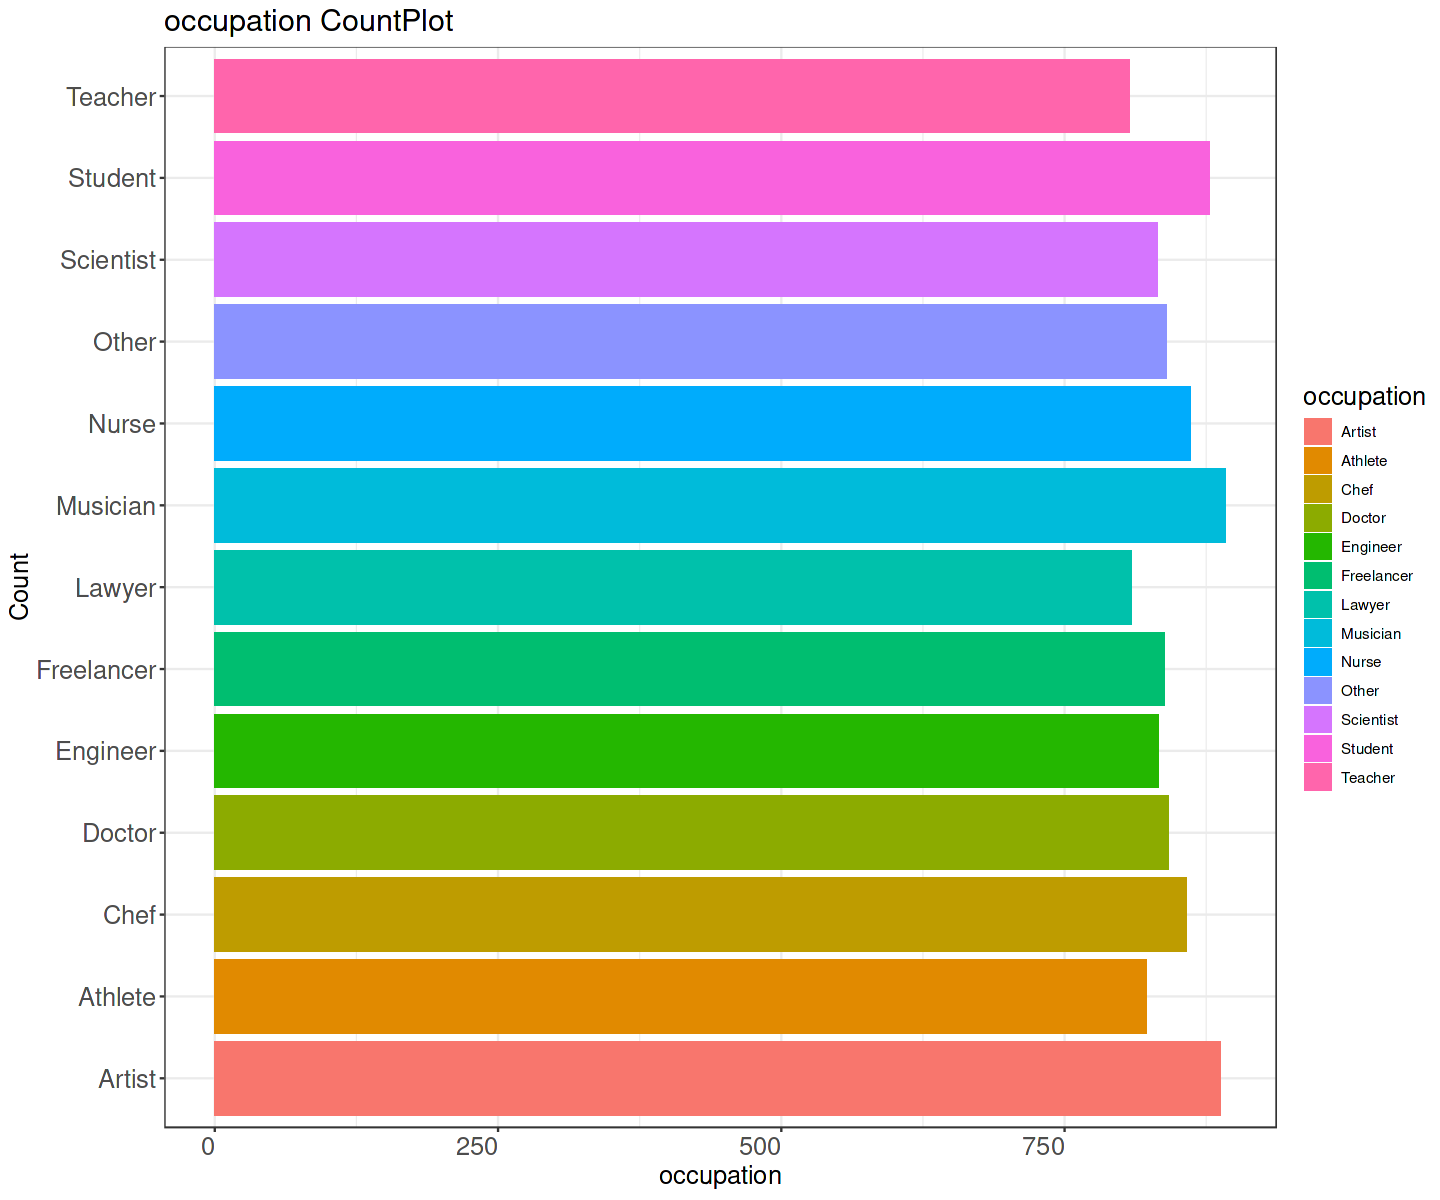

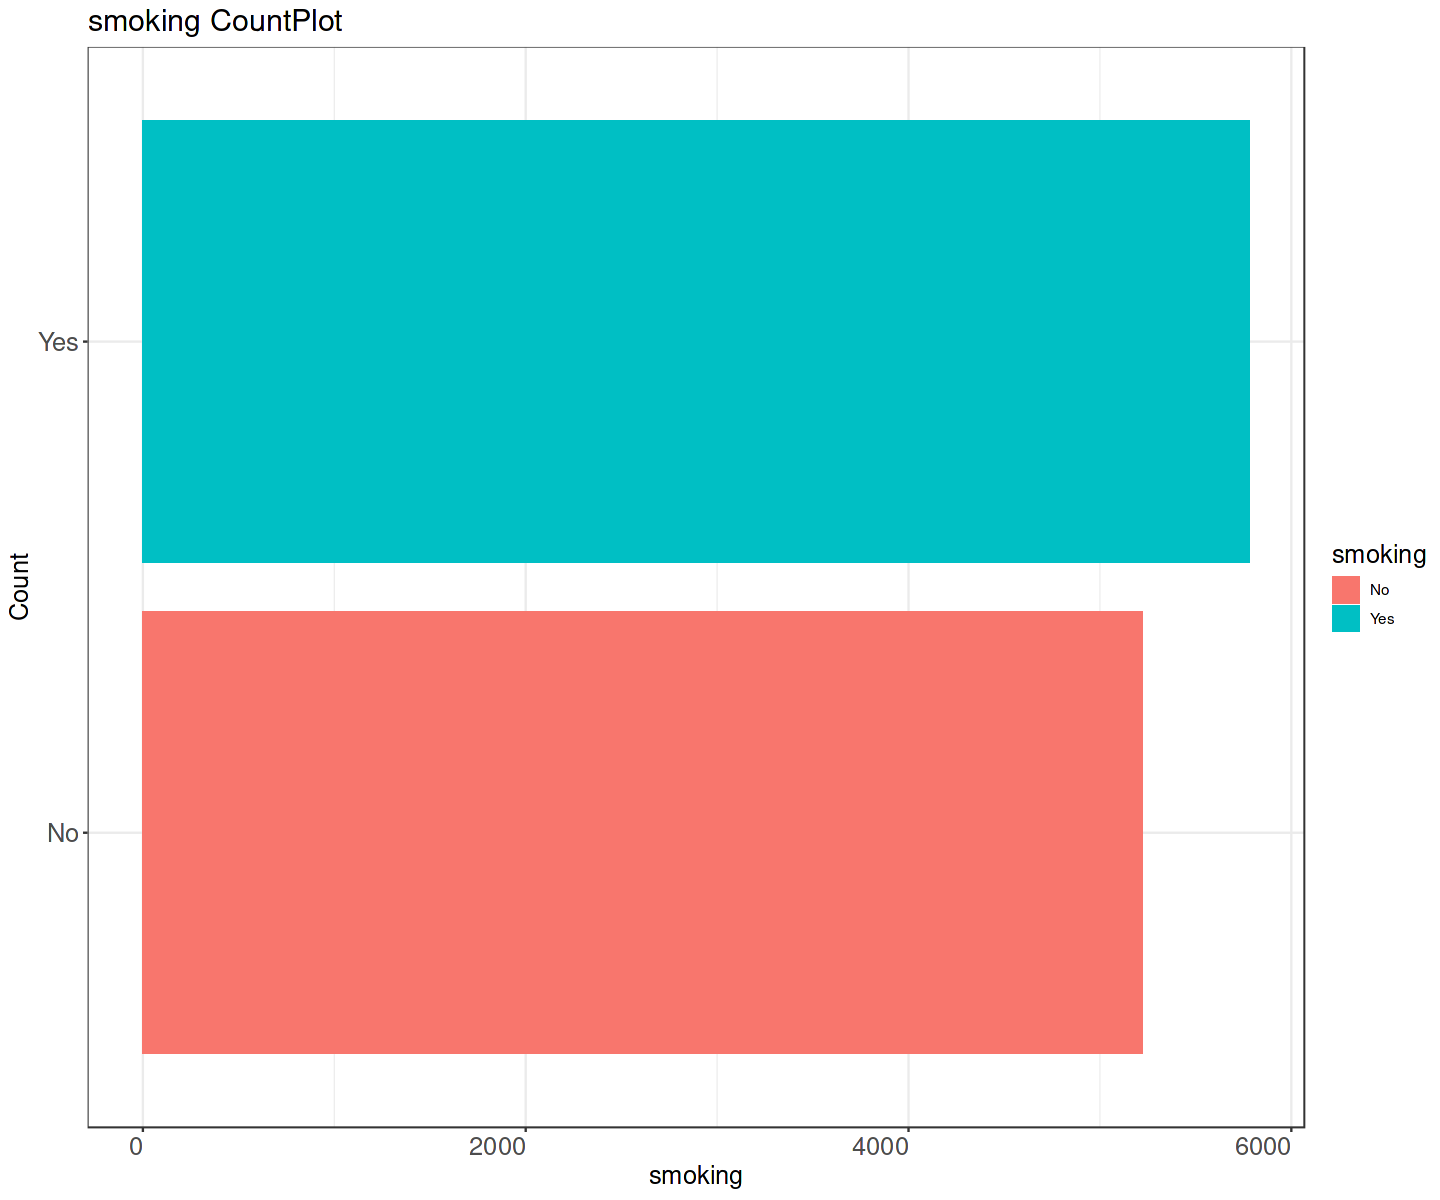

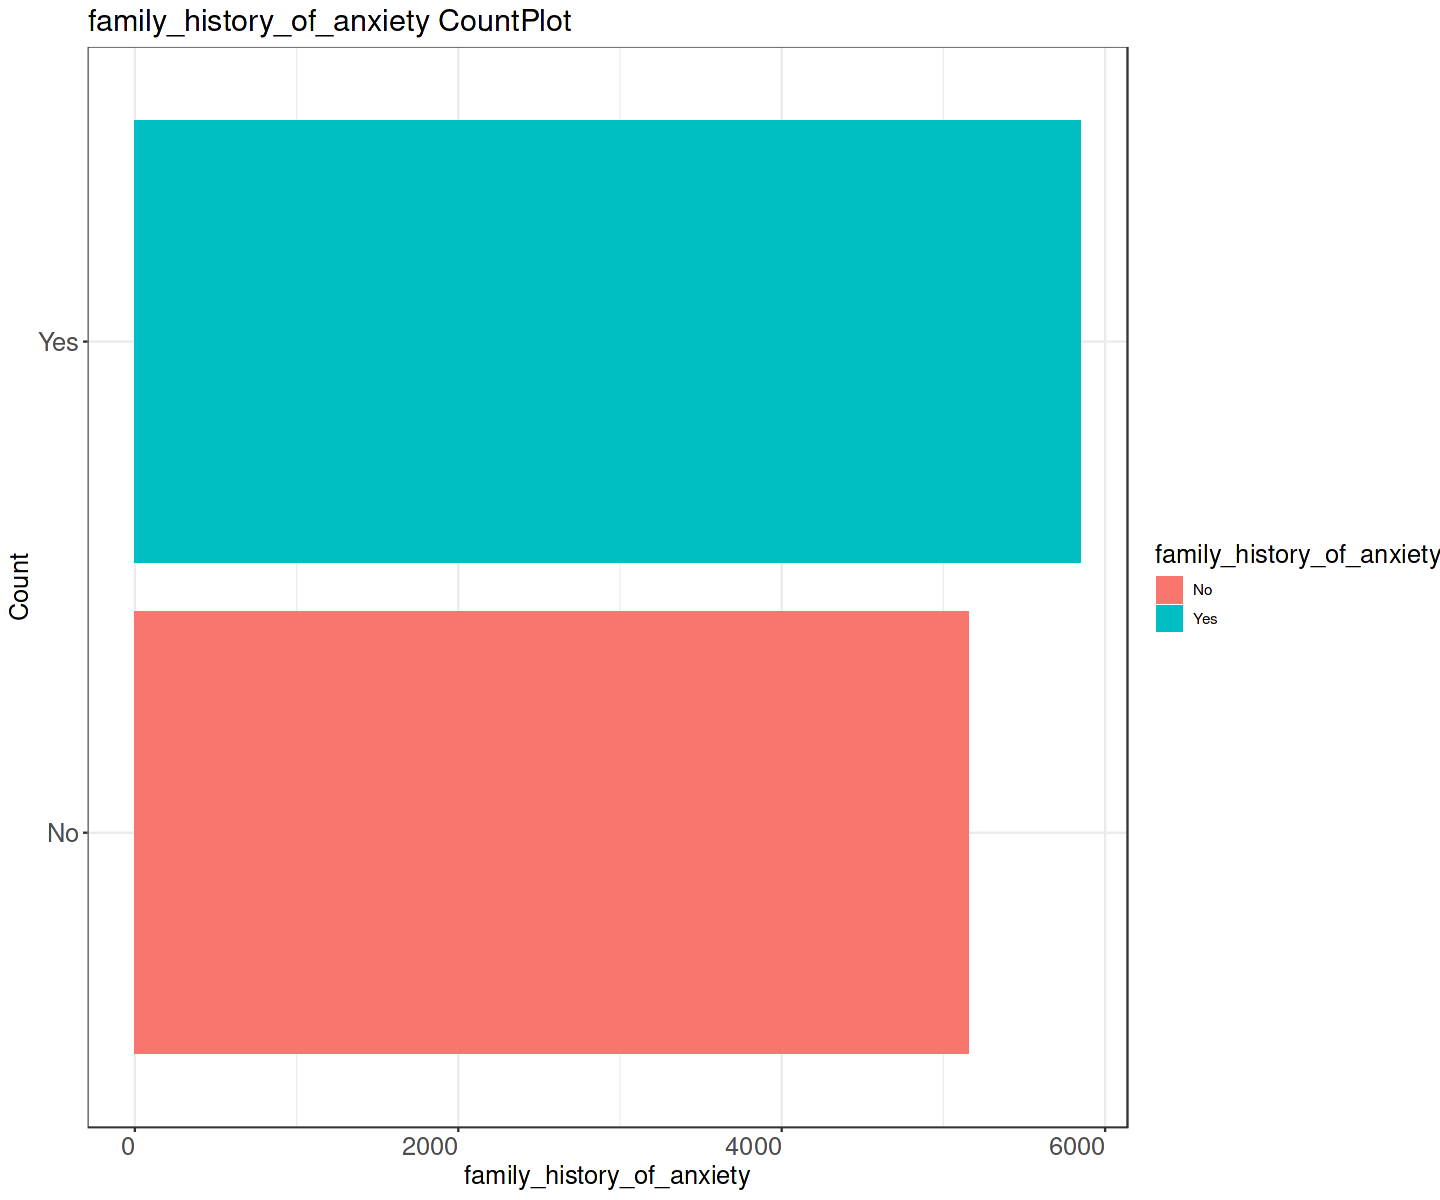

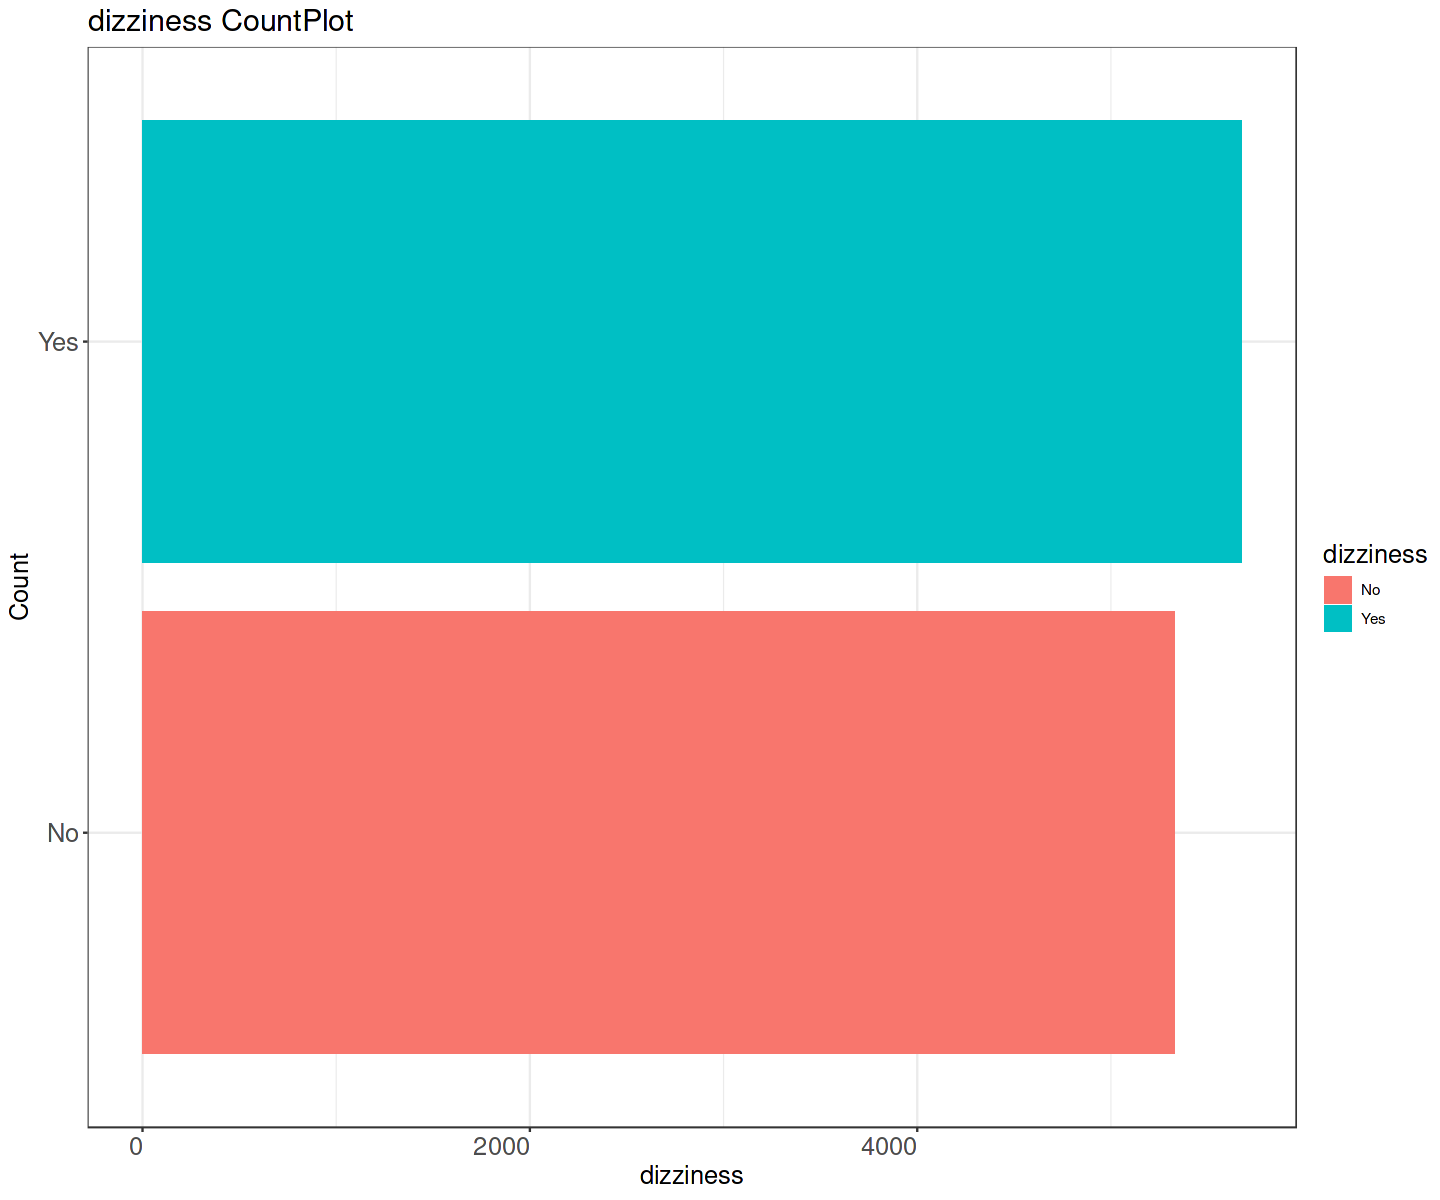

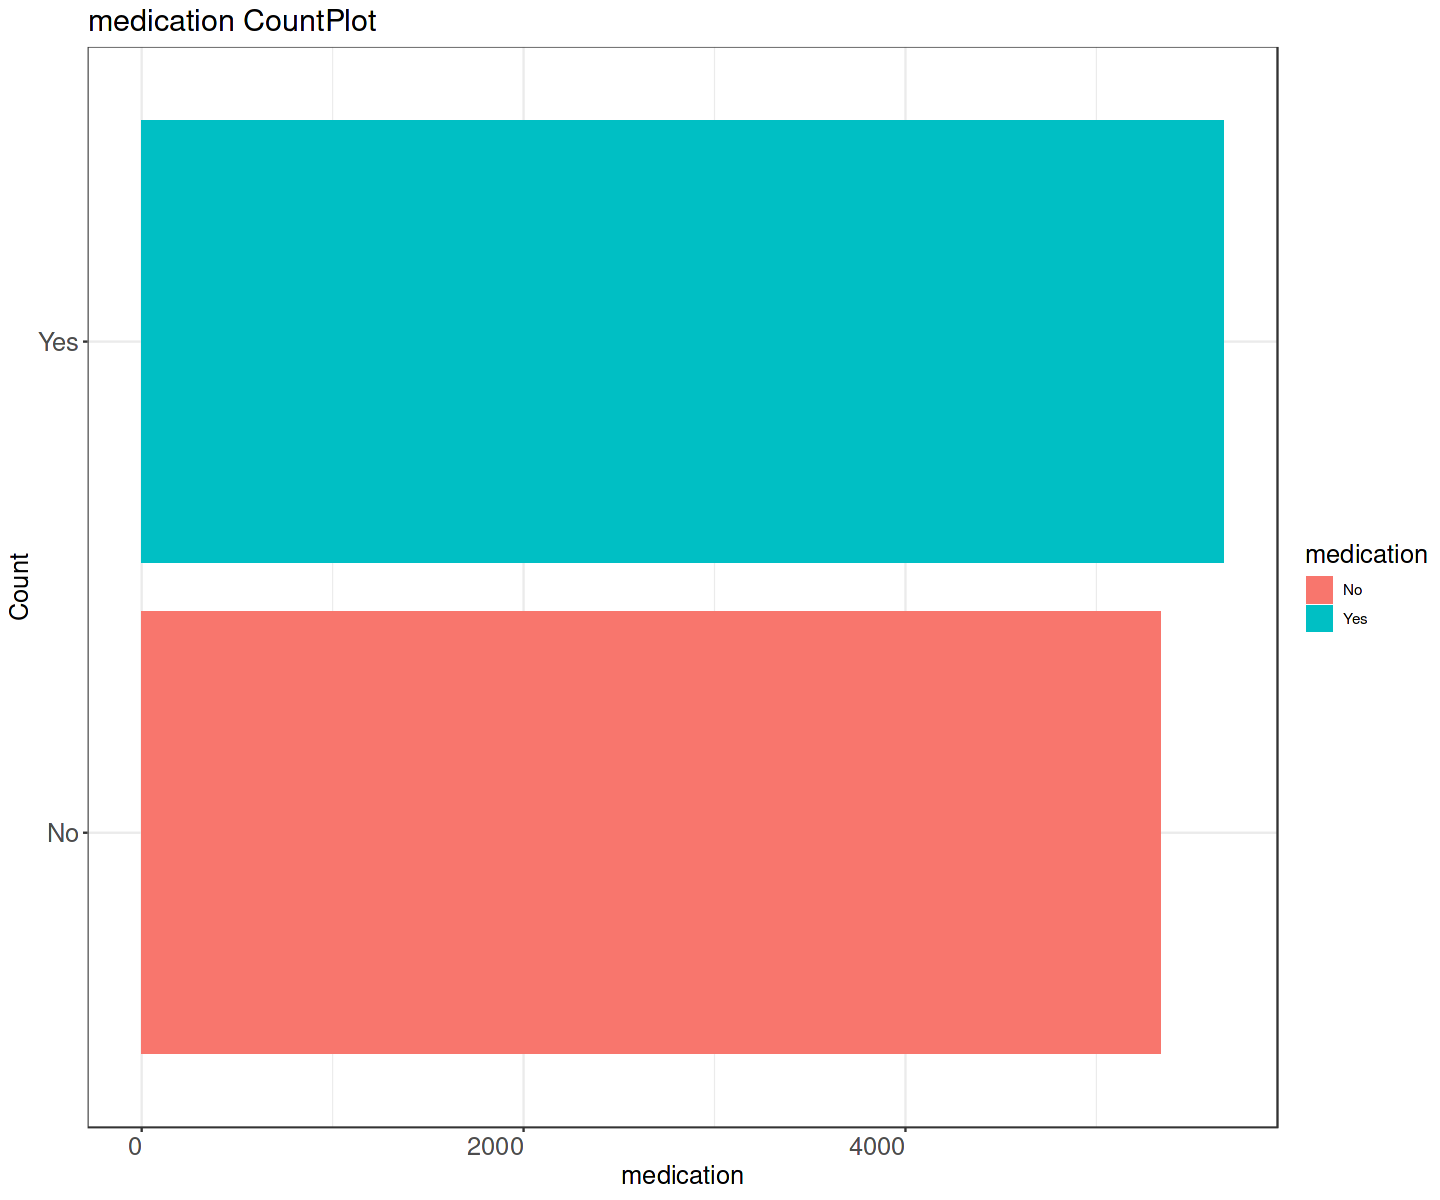

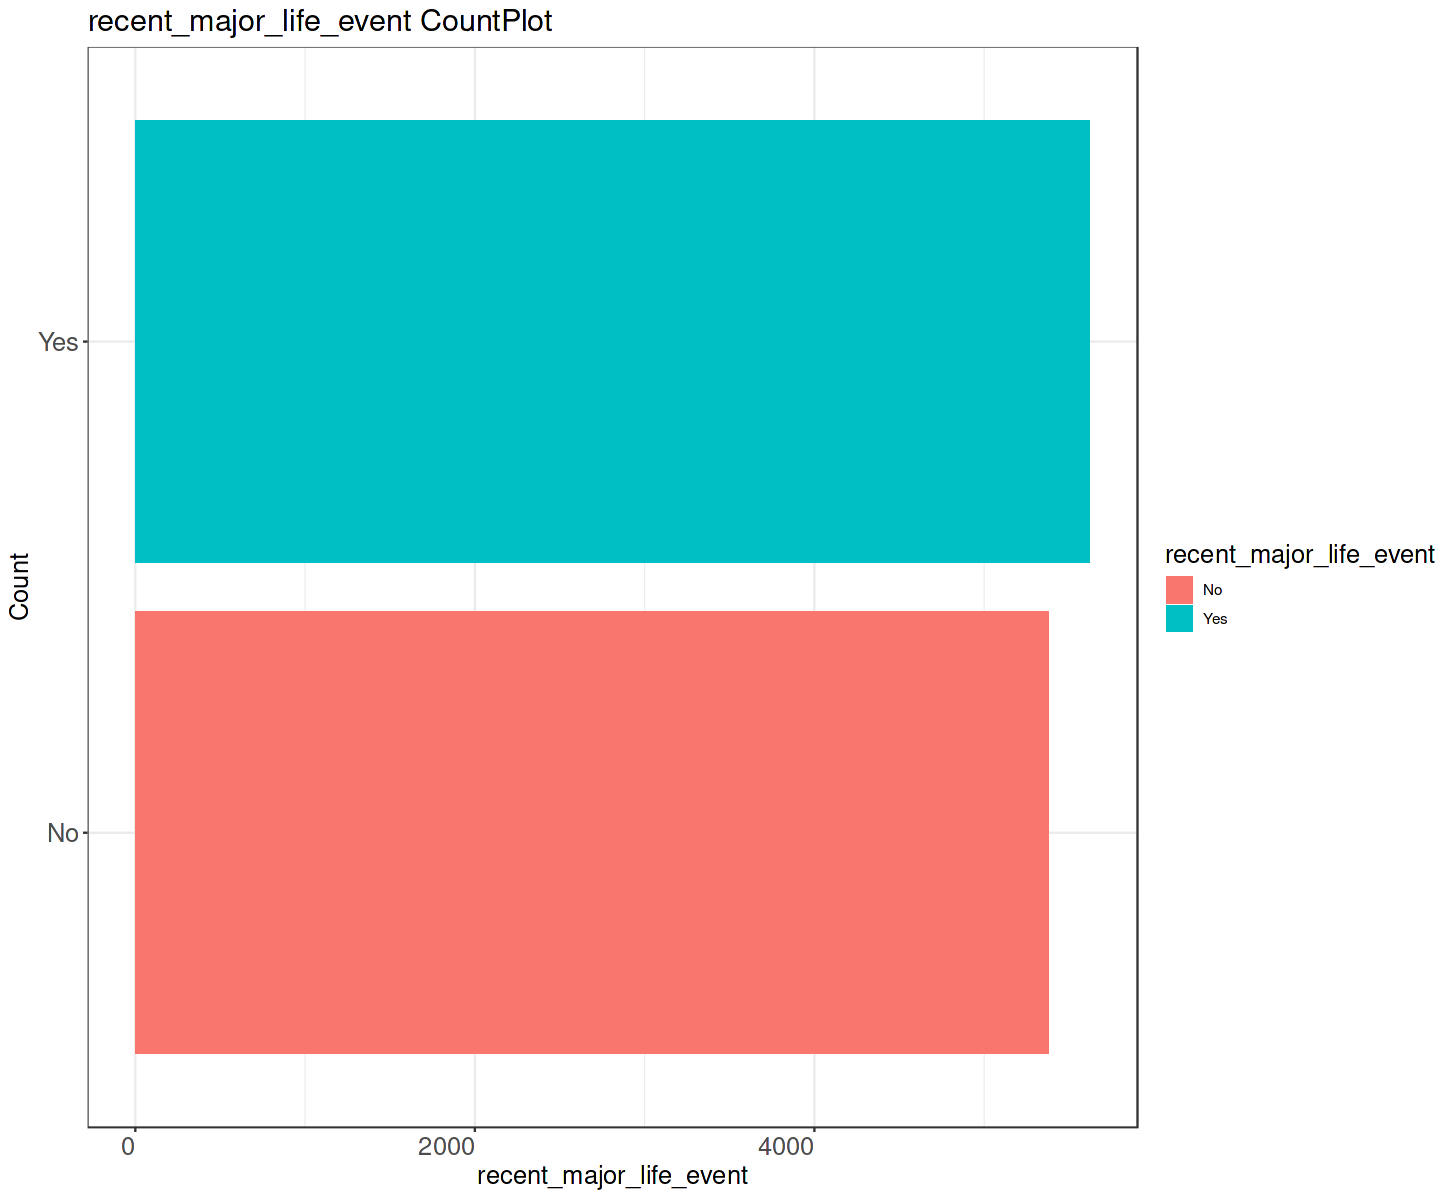

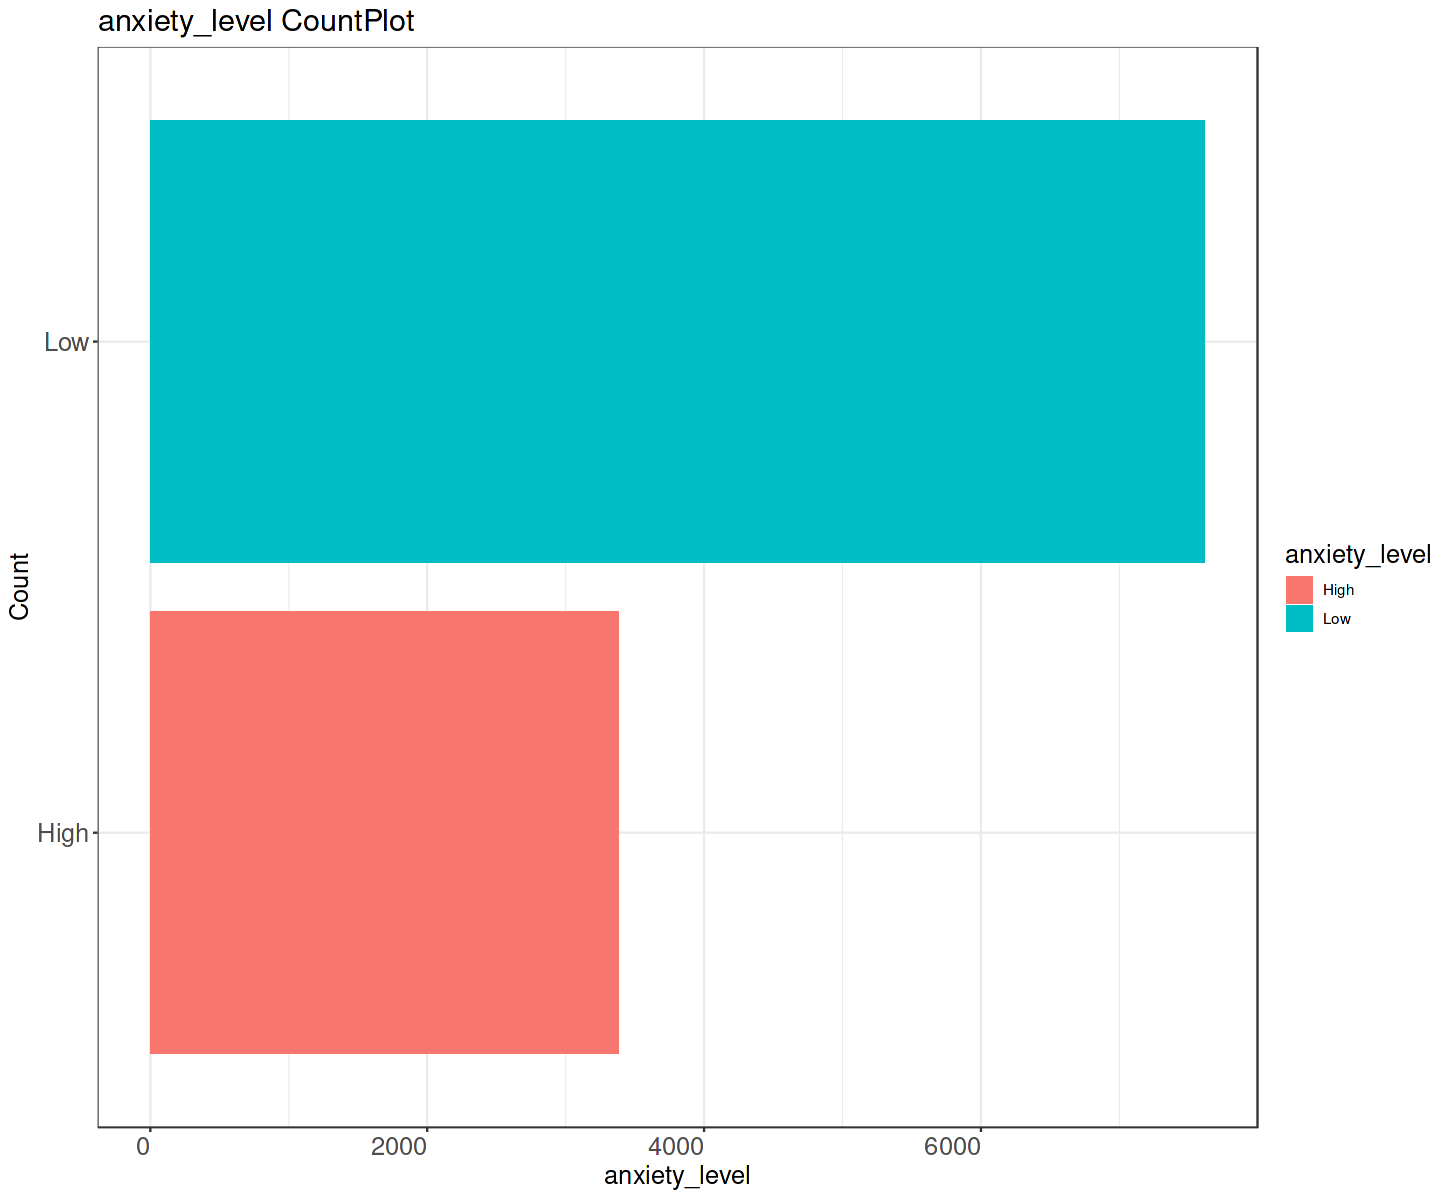

In [115]:
options(repr.plot.width = 12.0, repr.plot.height = 10.0)

for(i in cat_cols){
    a <- ggplot(df) + geom_bar(aes(y = df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1)      ,
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}

## **Correlation**

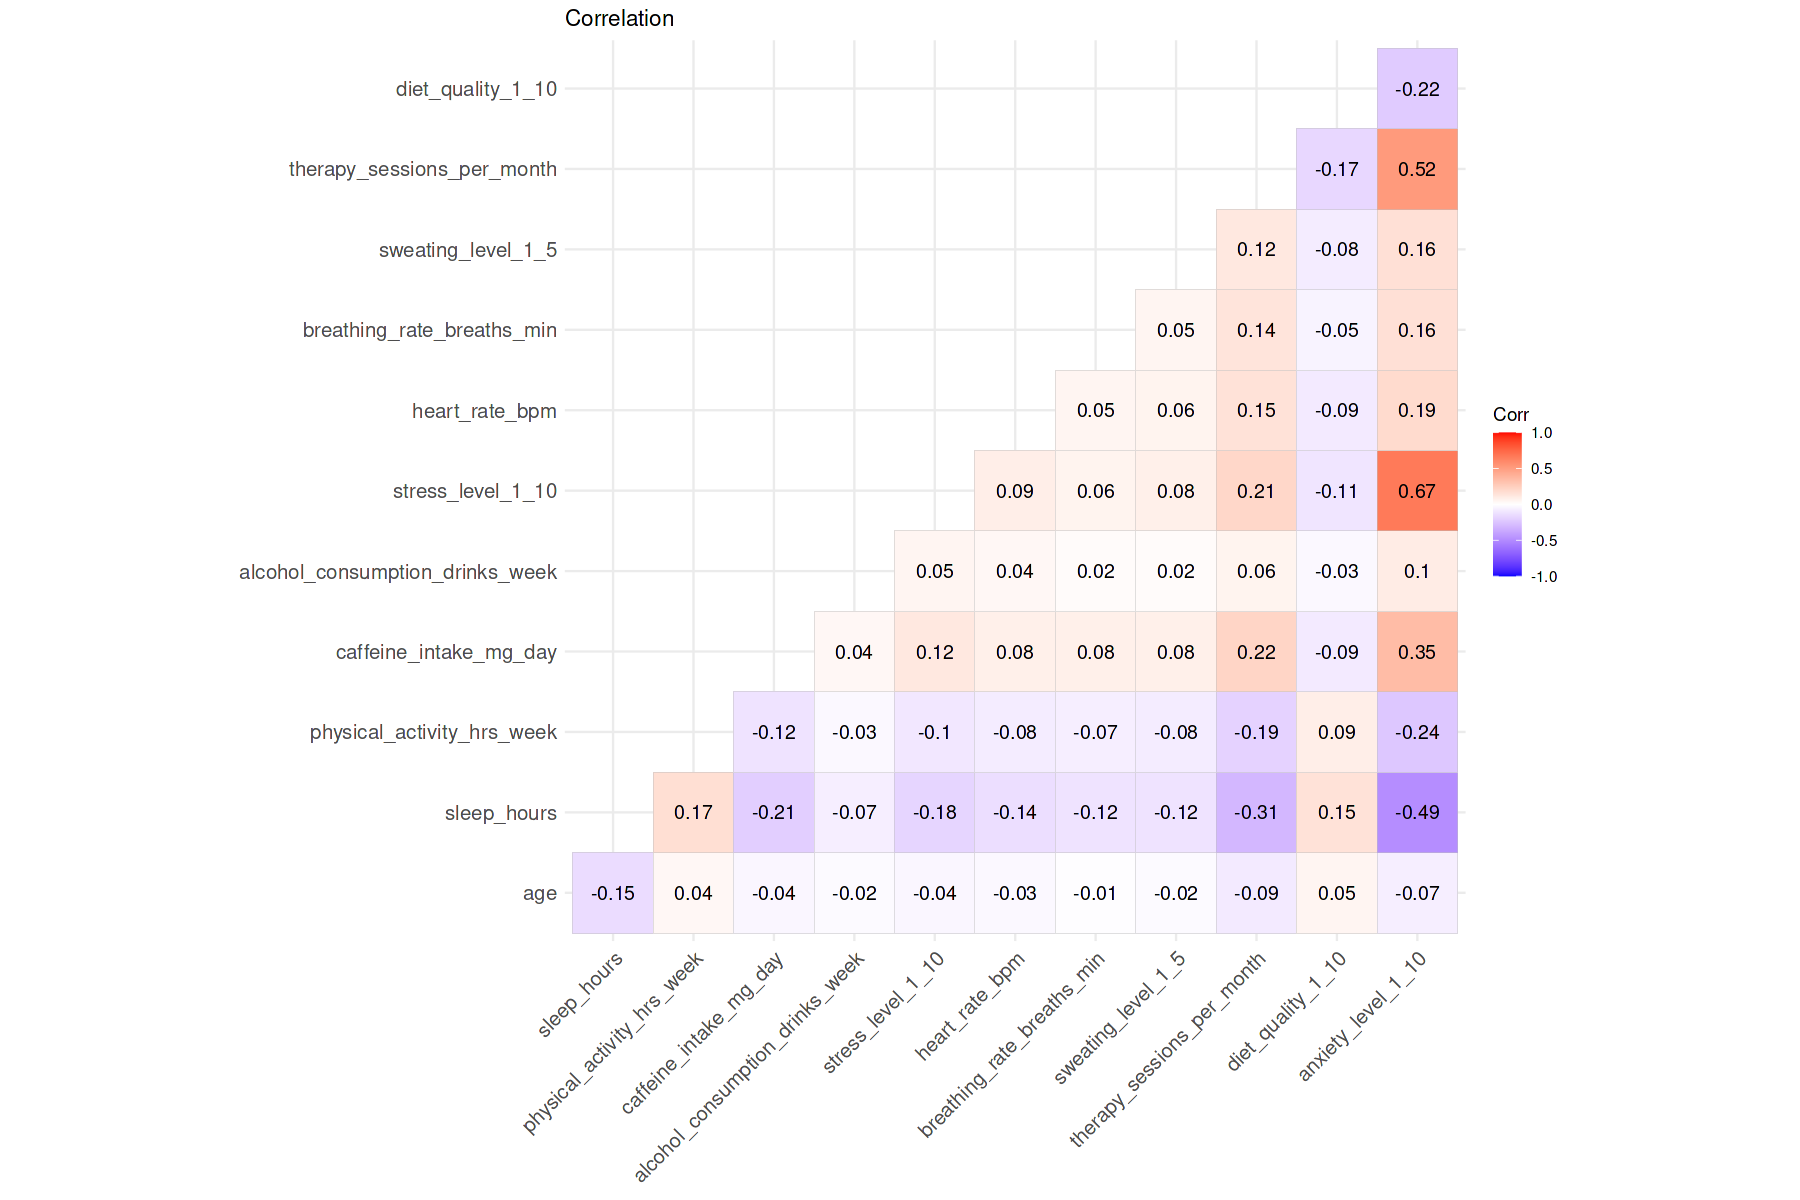

In [116]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [117]:
library(caret)
library(Metrics)

### **Model to use**
-------------
**1. LogisticRegression**   
**2. Simple XGBoost**   
**3. XGBoost**   

In [118]:
head(df)

,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,anxiety_level_1_10,anxiety_level
,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
1,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5,High
2,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3,Low
3,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1,Low
4,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2,Low
5,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1,Low
6,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4,Low


## **Data Preprocessing**

In [119]:
df <- df %>% select(-anxiety_level_1_10)

In [120]:
#Labeling

for (i in colnames(df)){
    if(is.factor(df[,i]) == TRUE)
        df[,i] <- as.numeric(df[,i])
}

In [121]:
#Target variable type conversion (Numeric -> Factor)

df$anxiety_level <- as.factor(df$anxiety_level)

## **Train Test Split**

In [122]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **5-FOLD**

In [123]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = anxiety_level)

## **Recipe**

In [124]:
rec <- recipes::recipe(anxiety_level ~ ., data = train) %>%
    recipes::step_dummy(all_nominal_predictors()) %>% 
    recipes::step_normalize(all_numeric_predictors()) %>%
    recipes::step_zv(all_predictors()) 

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 18



── Operations 

• Dummy variables from: all_nominal_predictors()

• Centering and scaling for: all_numeric_predictors()

• Zero variance filter on: all_predictors()



## **Logistic Regression**

In [125]:
#Logistic Regression Model
glm_model <- multinom_reg() %>%
    set_engine("nnet") %>%
    set_mode("classification")

glm_wf <- workflow() %>% 
  add_recipe(rec) %>% 
  add_model(glm_model)

#Fit
glm_fit <- glm_wf %>% 
  fit(data = train)

#pred
glm_pred <- glm_fit %>% predict(new_data = test)

In [129]:
glm_cm <- confusionMatrix(glm_pred$.pred_class, test$anxiety_level)
glm_cm

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1  441  147
         2  209 1403
                                          
               Accuracy : 0.8382          
                 95% CI : (0.8221, 0.8533)
    No Information Rate : 0.7045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6002          
                                          
 Mcnemar's Test P-Value : 0.001225        
                                          
            Sensitivity : 0.6785          
            Specificity : 0.9052          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.8703          
             Prevalence : 0.2955          
         Detection Rate : 0.2005          
   Detection Prevalence : 0.2673          
      Balanced Accuracy : 0.7918          
                                          
       'Positive' Class : 1               
                        

## **Simple XGB**

In [134]:
#eXtreme Gradient Boost Model

xgb_spec <-boost_tree() %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

#Fit
xgb_fit <- xgb_wf %>% 
  fit(data = train)

#pred
xgb_pred <- xgb_fit %>% predict(new_data = test)

In [135]:
xgb_cm <- confusionMatrix(xgb_pred$.pred_class, test$anxiety_level)
xgb_cm

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1  418  133
         2  232 1417
                                          
               Accuracy : 0.8341          
                 95% CI : (0.8179, 0.8494)
    No Information Rate : 0.7045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5831          
                                          
 Mcnemar's Test P-Value : 2.904e-07       
                                          
            Sensitivity : 0.6431          
            Specificity : 0.9142          
         Pos Pred Value : 0.7586          
         Neg Pred Value : 0.8593          
             Prevalence : 0.2955          
         Detection Rate : 0.1900          
   Detection Prevalence : 0.2505          
      Balanced Accuracy : 0.7786          
                                          
       'Positive' Class : 1               
                        

## **XGB**

In [138]:
xgb_spec2 <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

xgb_wf2 <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec2)

xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

### **Parameter**

In [139]:
params <- xgb_wf2 %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

### **Tune**

In [141]:
xgb_res <- tune_grid(
  xgb_wf2,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(yardstick::accuracy),
  param_info = params
)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/4

✓ Fold1: preprocessor 1/1, model 1/4

i Fold1: preprocessor 1/1, model 1/4 (extracts)

i Fold1: preprocessor 1/1, model 1/4 (predictions)

i Fold1: preprocessor 1/1, model 2/4

✓ Fold1: preprocessor 1/1, model 2/4

i Fold1: preprocessor 1/1, model 2/4 (extracts)

i Fold1: preprocessor 1/1, model 2/4 (predictions)

i Fold1: preprocessor 1/1, model 3/4

✓ Fold1: preprocessor 1/1, model 3/4

i Fold1: preprocessor 1/1, model 3/4 (extracts)

i Fold1: preprocessor 1/1, model 3/4 (predictions)

i Fold1: preprocessor 1/1, model 4/4

✓ Fold1: preprocessor 1/1, model 4/4

i Fold1: preprocessor 1/1, model 4/4 (extracts)

i Fold1: preprocessor 1/1, model 4/4 (predictions)

i Fold2: preprocessor 1/1

✓ Fold2: preprocessor 1/1

i Fold2: preprocessor 1/1, model 1/4

✓ Fold2: preprocessor 1/1, model 1/4

i Fold2: preprocessor 1/1, model 1/4 (extracts)

i Fold2: preprocessor 1/1, model 1/4 (predictions)

i Fold2

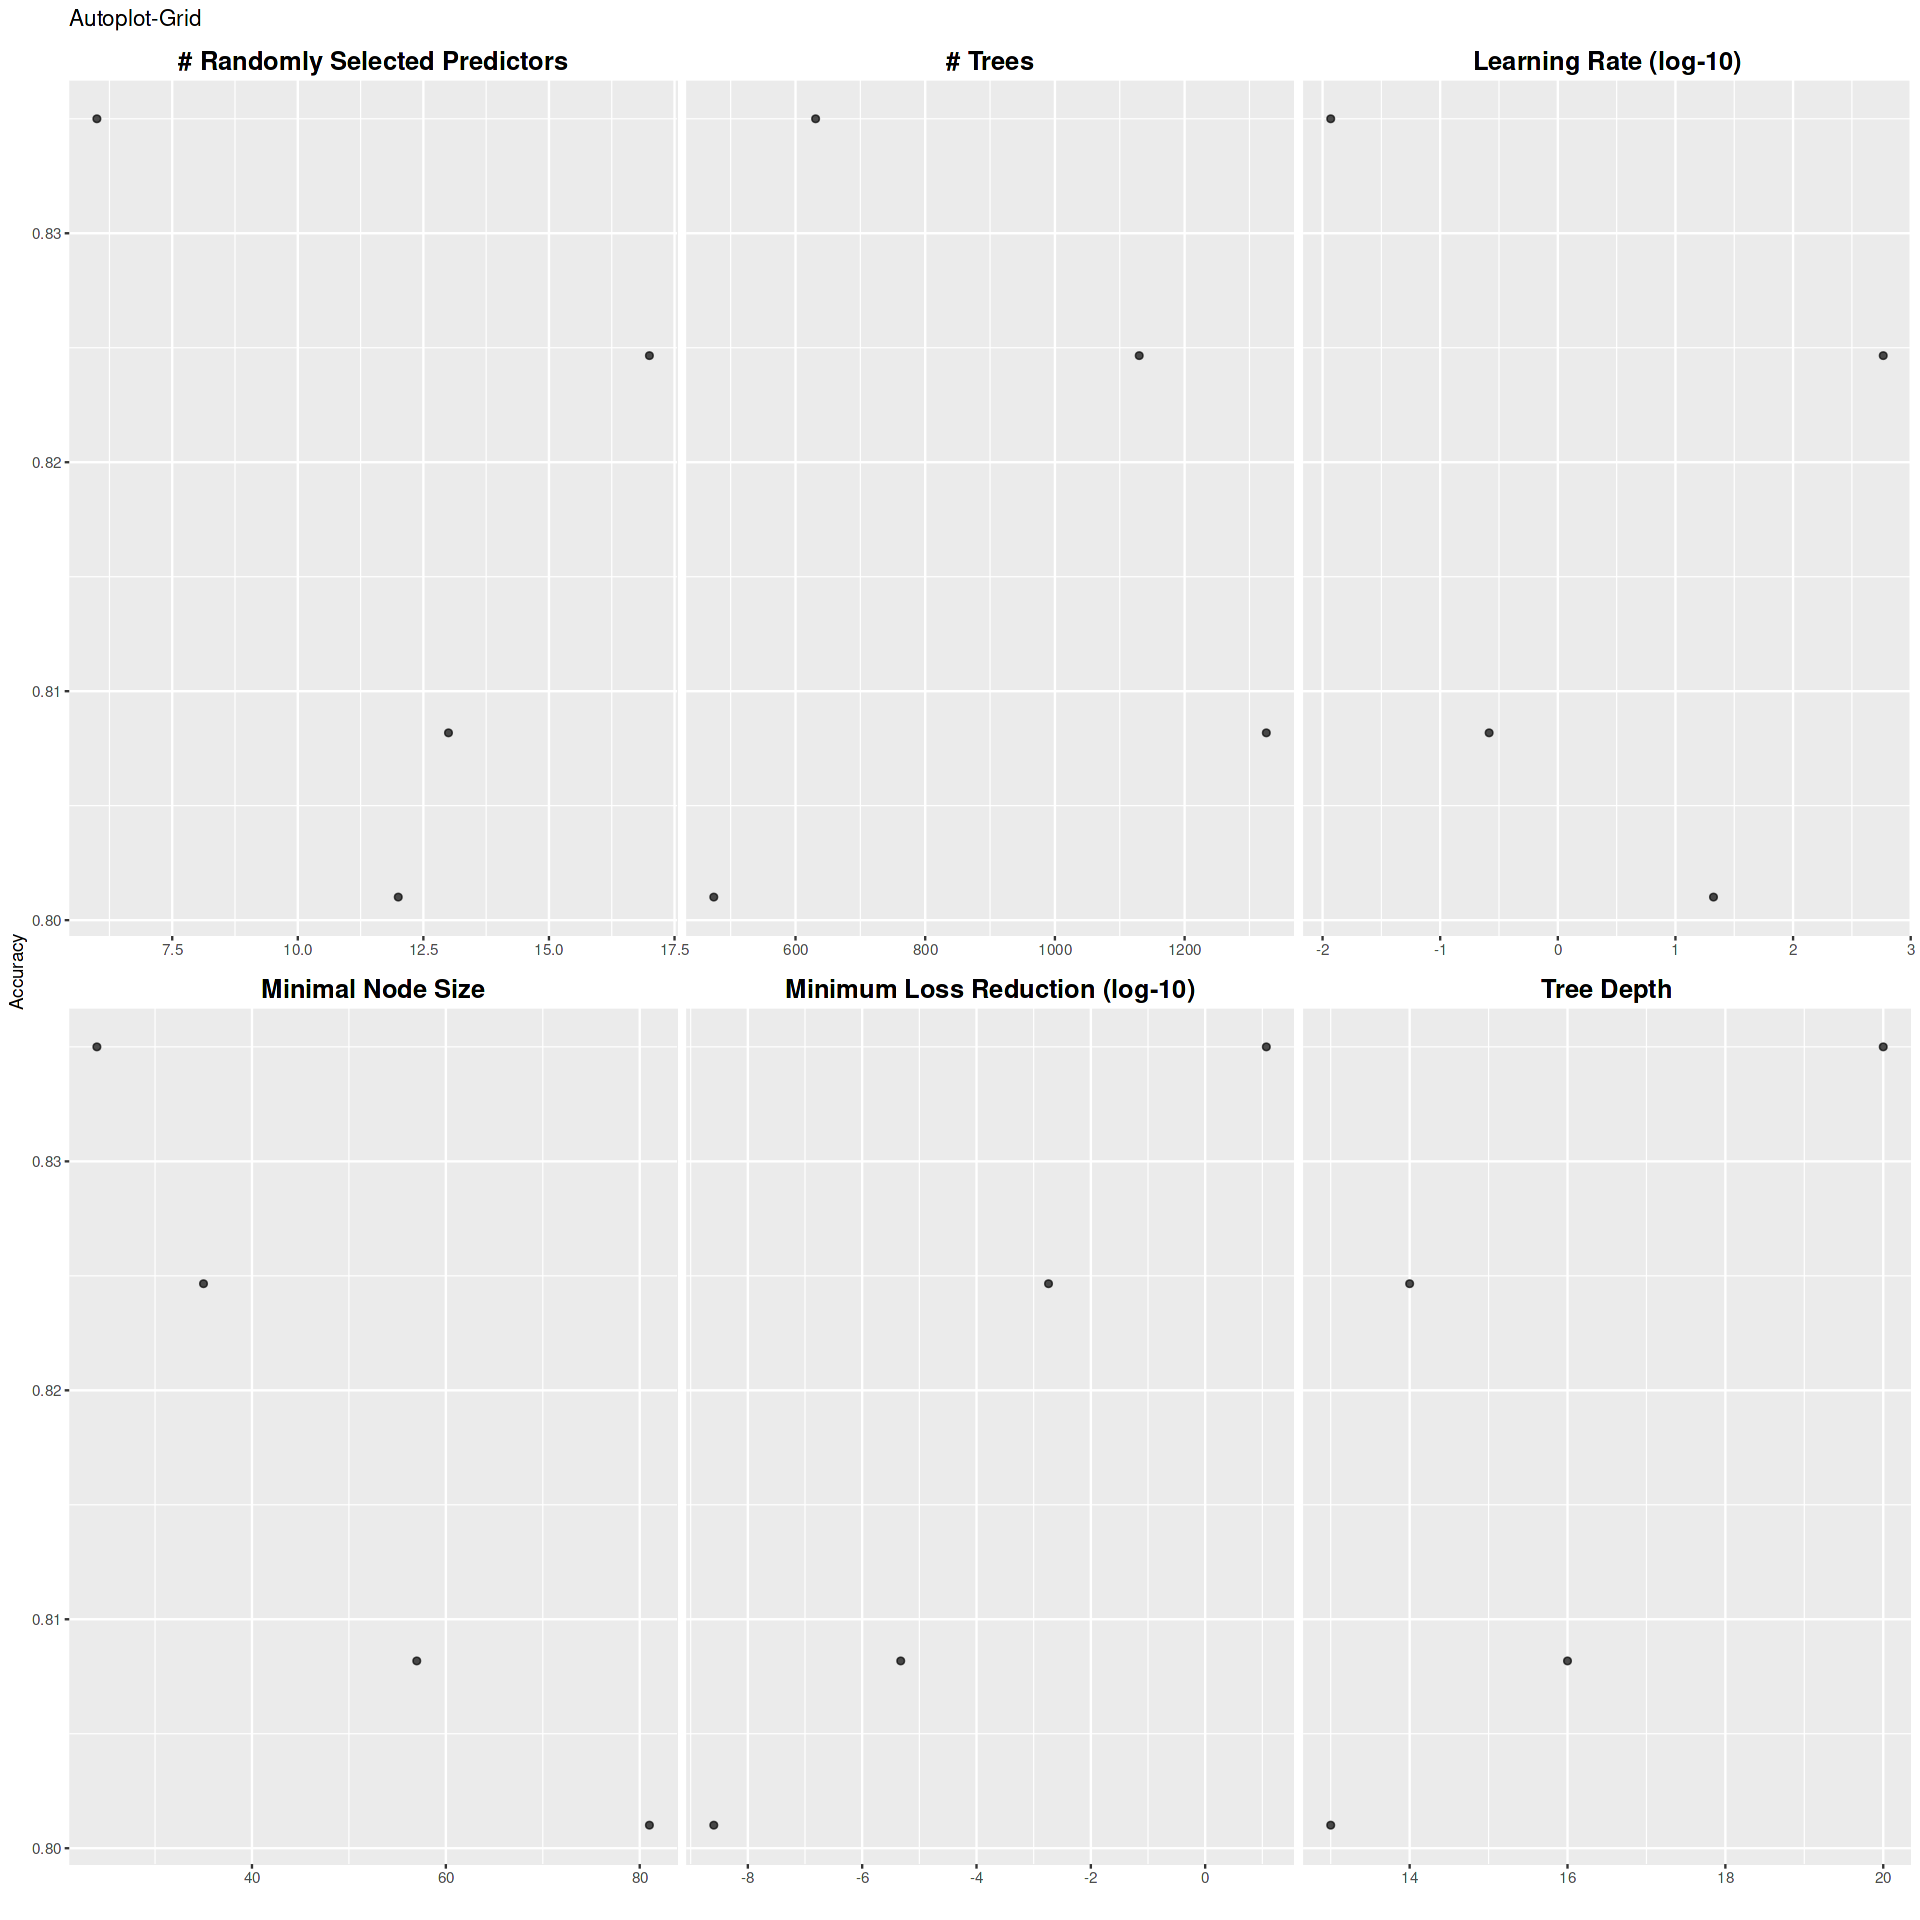

In [142]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [144]:
xgb_best <- select_best(xgb_res, metric =  "accuracy")
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
6,631,24,20,0.01173021,11.73998,Preprocessor1_Model1


In [145]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_dummy()
• step_normalize()
• step_zv()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [146]:
final_fit <- final_xgb_res %>%
  fit(train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_dummy()
• step_normalize()
• step_zv()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 59.4 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 15, watchlist = x$watchlist, 
    verbose = 0, nthread = c(system = 4), objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "4", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 18 
nit

In [147]:
xgb_pred2 <- predict(final_fit, new_data = test, type = 'class')

In [148]:
xgb_cm2 <- confusionMatrix(xgb_pred2$.pred_class, test$anxiety_level)
xgb_cm2

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1  418  133
         2  232 1417
                                          
               Accuracy : 0.8341          
                 95% CI : (0.8179, 0.8494)
    No Information Rate : 0.7045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5831          
                                          
 Mcnemar's Test P-Value : 2.904e-07       
                                          
            Sensitivity : 0.6431          
            Specificity : 0.9142          
         Pos Pred Value : 0.7586          
         Neg Pred Value : 0.8593          
             Prevalence : 0.2955          
         Detection Rate : 0.1900          
   Detection Prevalence : 0.2505          
      Balanced Accuracy : 0.7786          
                                          
       'Positive' Class : 1               
                        

## **Model Comparison**

In [152]:
score <- data.frame(Model = c('Logistic','Simple XGB','XGB') , 
                    Score = c(glm_cm$overall[1],xgb_cm$overall[1] ,xgb_cm2$overall[1]))
score

Model,Score
<chr>,<dbl>
Logistic,0.8381818
Simple XGB,0.8340909
XGB,0.8340909


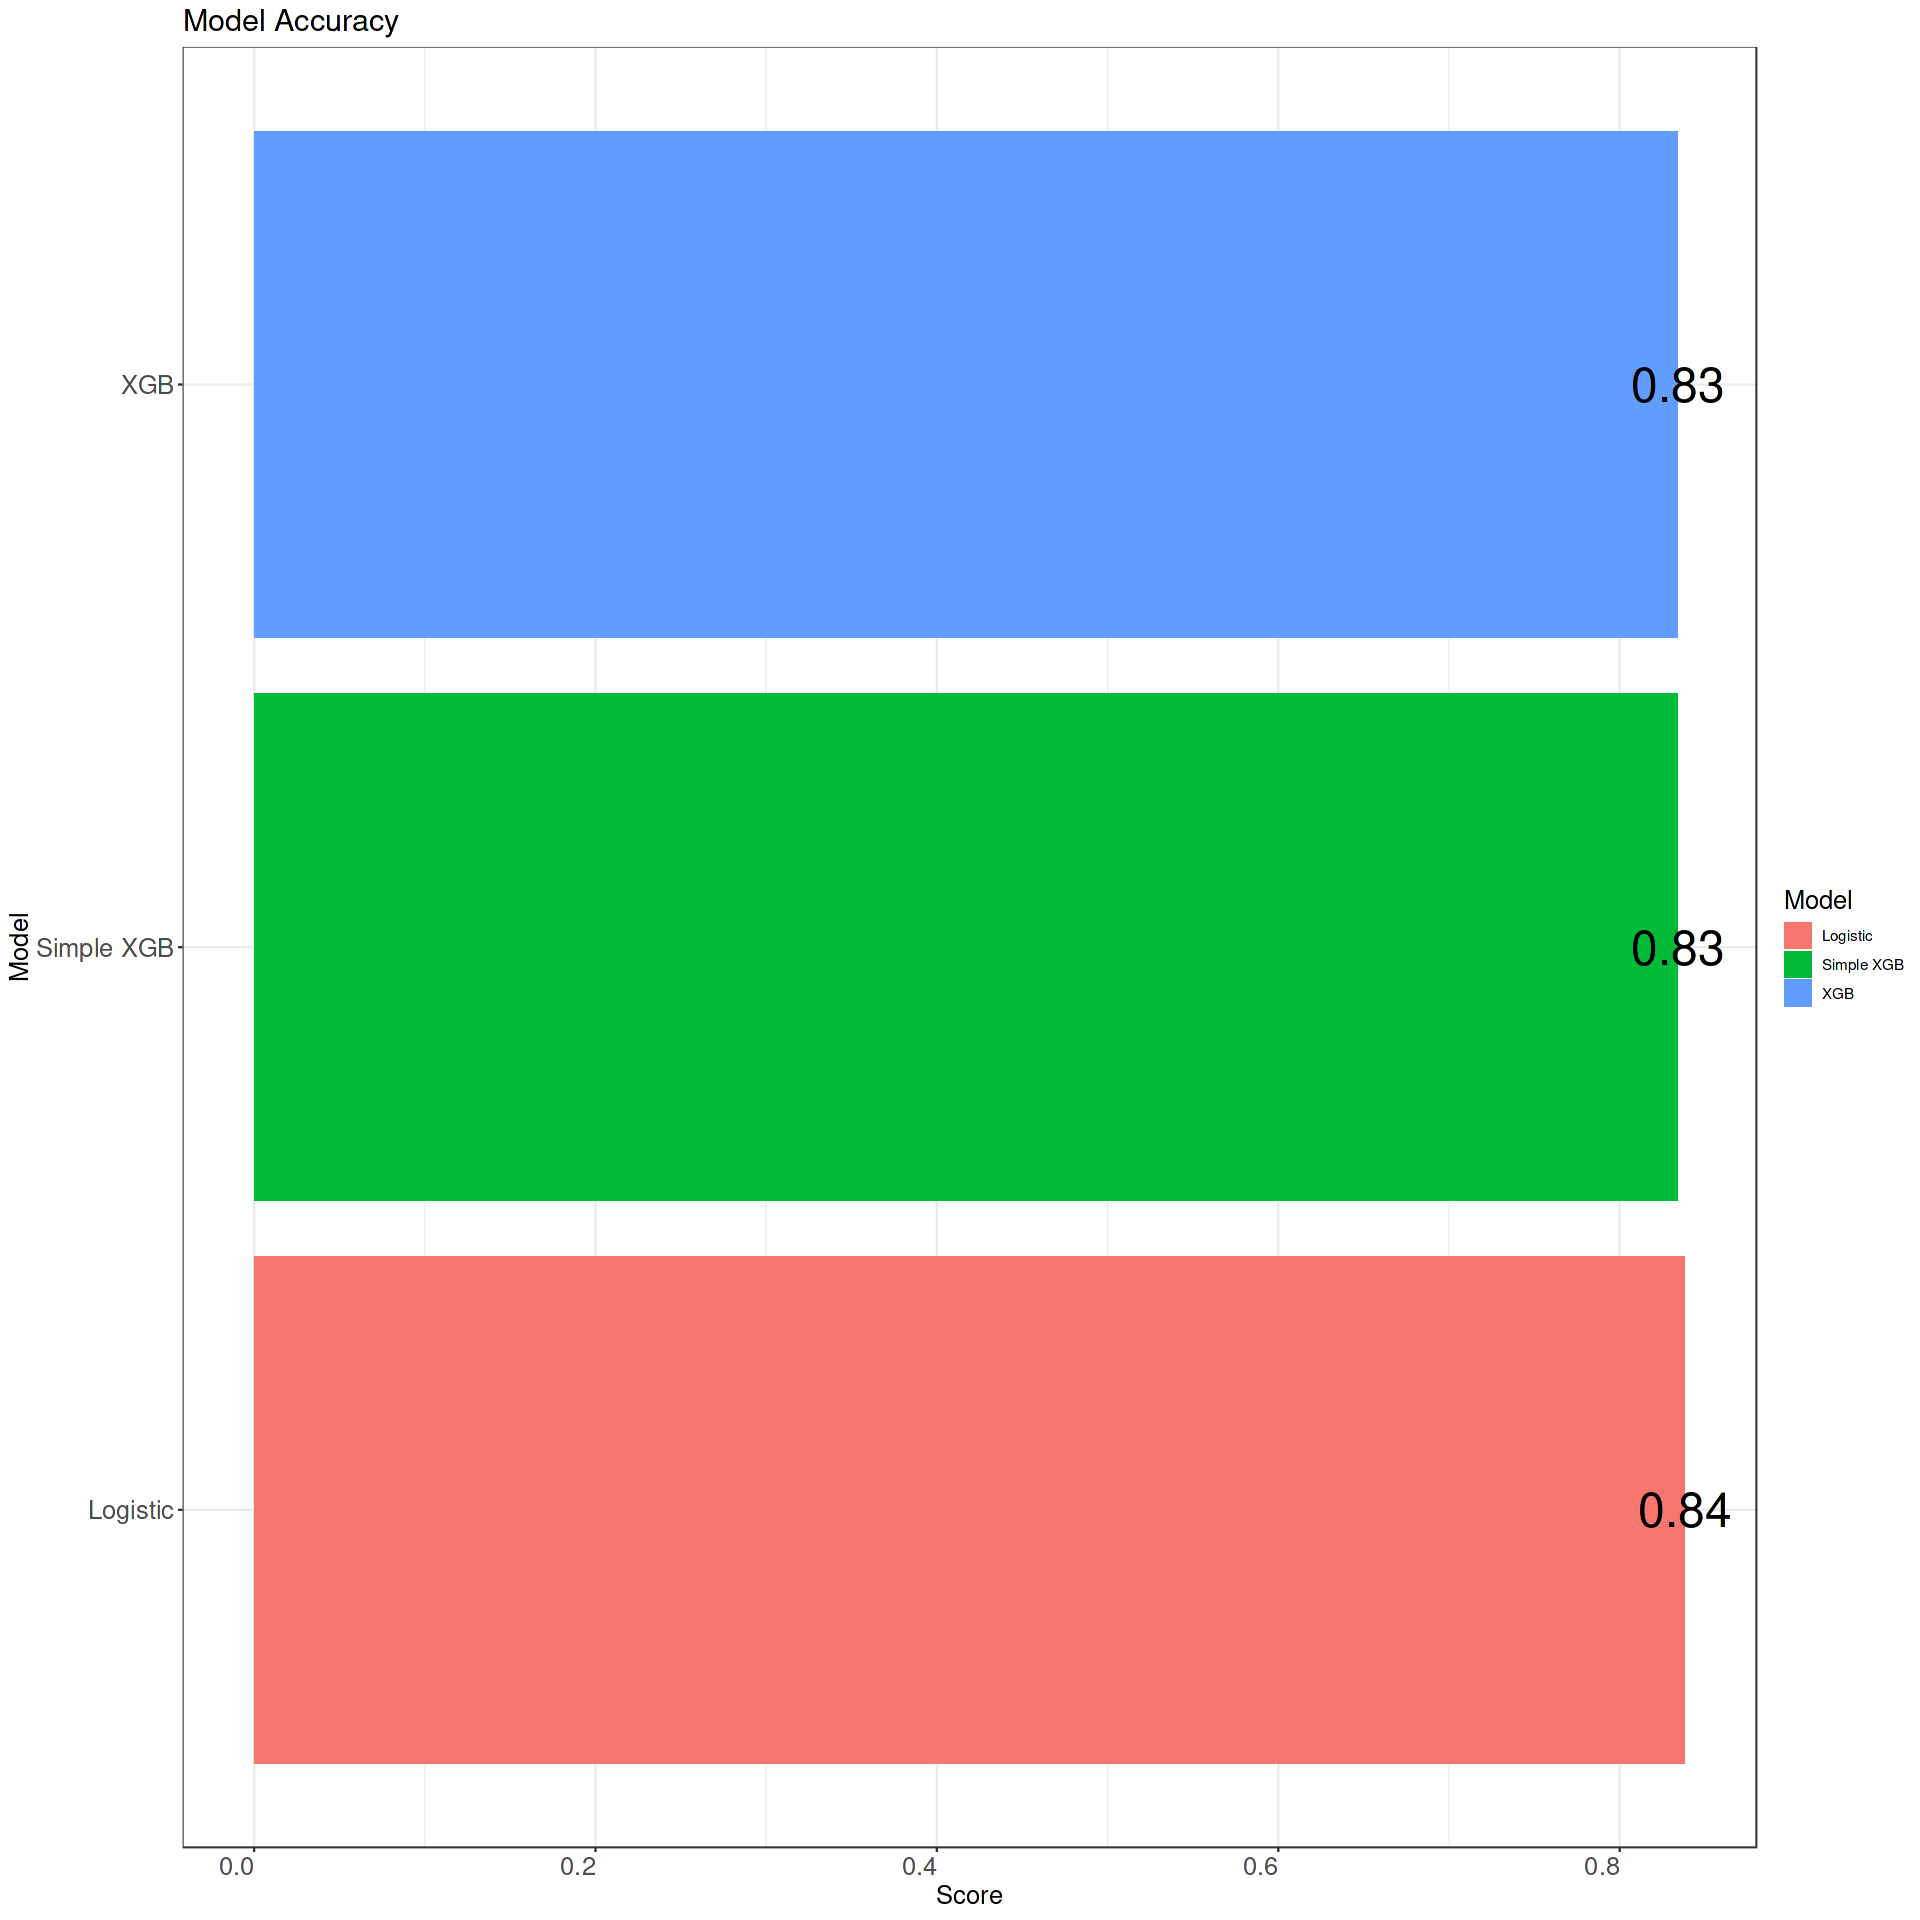

In [154]:
ggplot(score) + geom_col(aes(y=Model , x= Score , fill = Model)) +
    geom_text(aes(y = Model , x= Score, label= round(Score,2)), hjust=0.5, size = 10) +
    theme_bw() +
    ggtitle('Model Accuracy') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

**The accuracy of all models is similar.**

----------------------------

**Thankyou. Please leave your advice in the comments**